In [469]:
# General imports
import os
import sys
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import subprocess

from sklearn.cluster import KMeans

from tqdm import tqdm
# Other imports
tqdm.pandas()

import json

from pprint import pprint

# Custom utils
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from utils.utils import load_config_file

# Figures imports
import matplotlib

from matplotlib.lines import Line2D   
import matplotlib.patches as mpatches

import random 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statannot import add_stat_annotation
import matplotlib.font_manager as font_manager

# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

## YAML FILES CONFIG
yaml = load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

dicts = json.load(open("/home/weber/PycharmProjects/EXOTIC/src/EXOTIC_config.json"))


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [378]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights.max().max()

622

# Cluspack

## Def cluspack

In [58]:
def cluspack(intput_file, cm, nbc):
#     print(cm, nbc)
    output_file_path = intput_file.split(".")[0] + ".clu"

#     if os.path.isfile(output_file_path) is False:
    args = [
        "/biolo/cluspack/binNew/cluspack",
        intput_file,
        "-dt=coordinates",
        "-cm={}".format(cm),
        "-nbc={}".format(nbc),
#             "-wc",
        "-oclu",
    ]
    p1 = subprocess.Popen(args)
    p1.wait()

    d_stats = collections.defaultdict(dict)
    output_file = open(output_file_path, "r").readlines()
    nb_clusters = int(output_file[0].strip().split(" : ")[1])
#     print(nb_clusters)
    cluster = 0
    for line in output_file[1:]:
        line = line.strip()
        if line:
            if "Cluster" in line:
                cluster = int(line.split(" ; ")[0].replace("Cluster ", ""))
                size = int(line.split(" ; ")[1].replace("size=", ""))
                d_stats[cluster]["Size"] = size
                d_stats[cluster]["Indexes"] = list()
            else:
                d_stats[cluster]["Indexes"].append(int(line))
    cluspack_df = pd.DataFrame.from_dict(d_stats).T.reset_index().rename({"index": "cluster"}, axis=1)
    return cluspack_df, nb_clusters

## Run cluspack

In [60]:
# df_raw = pd.read_parquet("/gstock/EXOTIC/data/GENOMICS/RefSeq_exons_simple.parquet")
# df_raw["Introns_lengths"] = df_raw["Introns_ranges"].apply(lambda r: [int(e.split("-")[1]) - int(e.split("-")[0]) for e in r if int(e.split("-")[1]) - int(e.split("-")[0]) > 0 and int(e.split("-")[1]) - int(e.split("-")[0]) < 2e6])
# df_raw['Introns_nb'] = df_raw['Introns_lengths'].str.len()
# df_raw["Introns_lengths_ratio"] = df_raw["Introns_lengths"].apply(lambda r: pd.Series(pd.Series(r) / pd.Series(r).sum()).round(2).values.tolist())

# keys = [5,7,10,20]
keys = range(2,31)
couples = [['kmeans', 'dpc'], ['mm', 'aic'], ['mm', 'bic']]

for k in keys:
    for couple in couples:

        tmp_df_key = df_raw.loc[df_raw['Introns_nb'] == k].reset_index(drop=True)
        X = pd.DataFrame.from_records(tmp_df_key.Introns_lengths_ratio)
        shape = X.shape[0]
        X.to_csv('/gstock/EXOTIC/data/CLUSTERING/TMP/clustering_{}_{}.csv'.format(k, "_".join(couple)), sep='\t', header=False)
        df, nb_clusters = cluspack(intput_file="/gstock/EXOTIC/data/CLUSTERING/TMP/clustering_{}_{}.csv".format(k, "_".join(couple)), cm=couple[0], nbc=couple[1])
        print("Couple : {} \t Introns : {} \t Nb clusters : {} \t Nb indiv : {}".format(" - ".join(couple), k, nb_clusters, shape))
    print('\n')
    
#     print('\n')

#     df = df.drop(['Size'], axis=1).explode('Indexes').sort_values(by="Indexes").reset_index(drop=True)
#     df['Miso'] = tmp_df_key['Miso']
# #     print(df)

#     gb = df.groupby(['cluster'])['Miso'].value_counts().rename('Count').reset_index().pivot(index='cluster', columns='Miso', values='Count')
#     gb.loc['Sum'] = gb.sum()
#     gb['Ratio'] = gb[True] / gb[False]
#     gb['Fold'] = gb['Ratio'] / gb.loc['Sum']['Ratio']
#     gb.columns = [str(c) for c in gb.columns]
#     gb['Total'] = gb['False'] + gb['True']
#     print(gb)


Couple : kmeans - dpc 	 Introns : 2 	 Nb clusters : 64 	 Nb indiv : 1166
Couple : mm - aic 	 Introns : 2 	 Nb clusters : 1 	 Nb indiv : 1166
Couple : mm - bic 	 Introns : 2 	 Nb clusters : 1 	 Nb indiv : 1166


Couple : kmeans - dpc 	 Introns : 3 	 Nb clusters : 175 	 Nb indiv : 1564
Couple : mm - aic 	 Introns : 3 	 Nb clusters : 28 	 Nb indiv : 1564
Couple : mm - bic 	 Introns : 3 	 Nb clusters : 4 	 Nb indiv : 1564


Couple : kmeans - dpc 	 Introns : 4 	 Nb clusters : 48 	 Nb indiv : 1328
Couple : mm - aic 	 Introns : 4 	 Nb clusters : 23 	 Nb indiv : 1328
Couple : mm - bic 	 Introns : 4 	 Nb clusters : 4 	 Nb indiv : 1328


Couple : kmeans - dpc 	 Introns : 5 	 Nb clusters : 34 	 Nb indiv : 1301
Couple : mm - aic 	 Introns : 5 	 Nb clusters : 31 	 Nb indiv : 1301
Couple : mm - bic 	 Introns : 5 	 Nb clusters : 4 	 Nb indiv : 1301


Couple : kmeans - dpc 	 Introns : 6 	 Nb clusters : 29 	 Nb indiv : 1101
Couple : mm - aic 	 Introns : 6 	 Nb clusters : 20 	 Nb indiv : 1101
Couple : m

In [91]:
dext = pd.read_parquet('/gstock/EXOTIC/data/EXOTIC/dext_matrix.parquet')

# Clustering with sklearn

In [133]:
df_raw.columns

Index(['Gene', 'mRNA_nb_total', 'Strand', 'Miso', 'Exons_ranges',
       'Introns_ranges', 'CDS_count', 'dext', 'dext_up', 'dext_down',
       'Introns_lengths', 'Introns_nb'],
      dtype='object')

0it [00:00, ?it/s]

True     10937
False     8369
Name: Miso, dtype: int64


28it [00:06,  4.24it/s]
0it [00:00, ?it/s]

False    8665
True     2272
Name: dext, dtype: int64


28it [00:04,  5.64it/s]


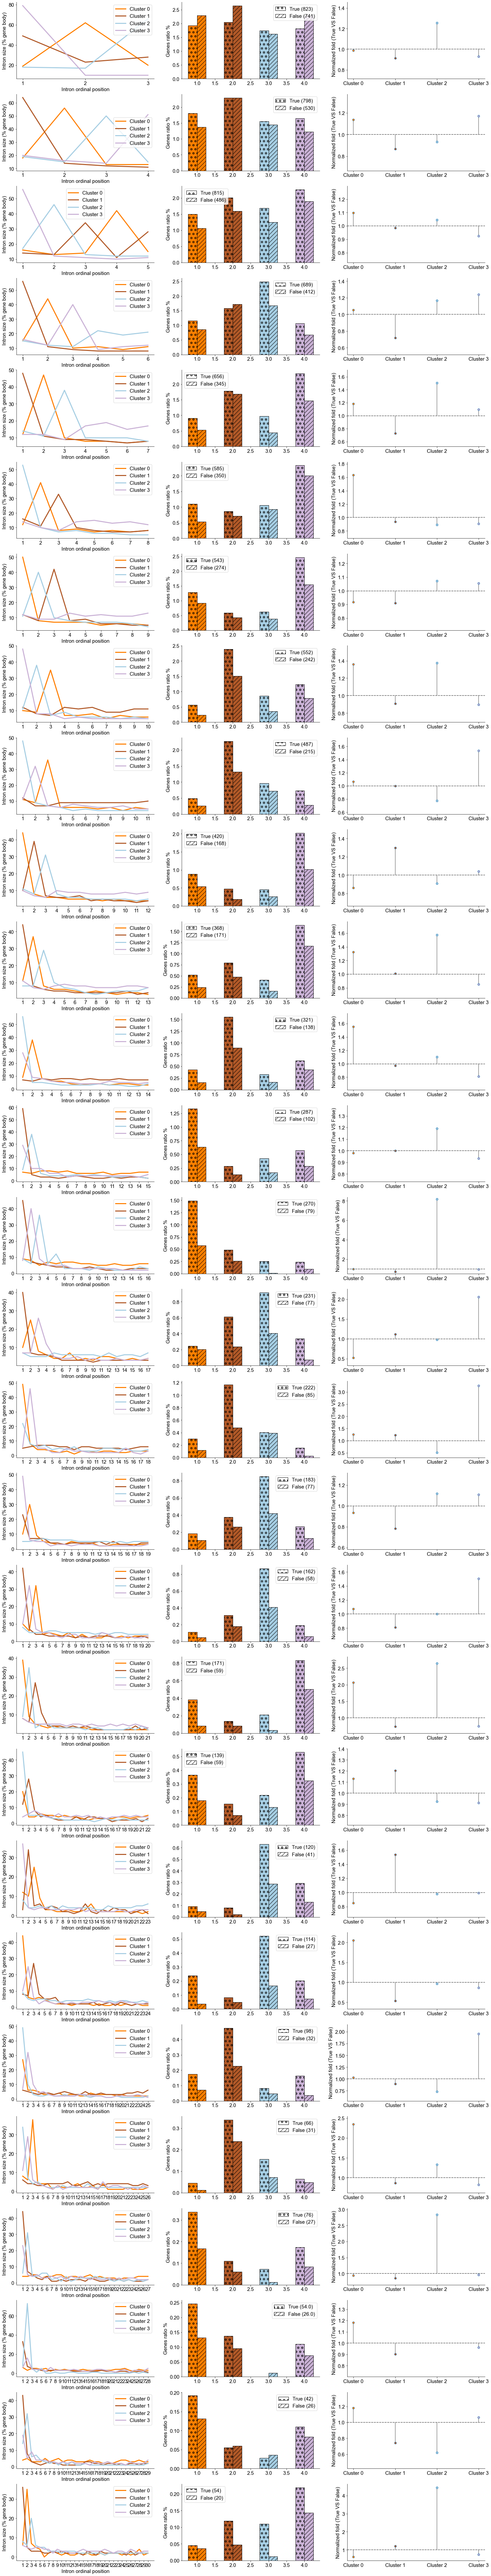

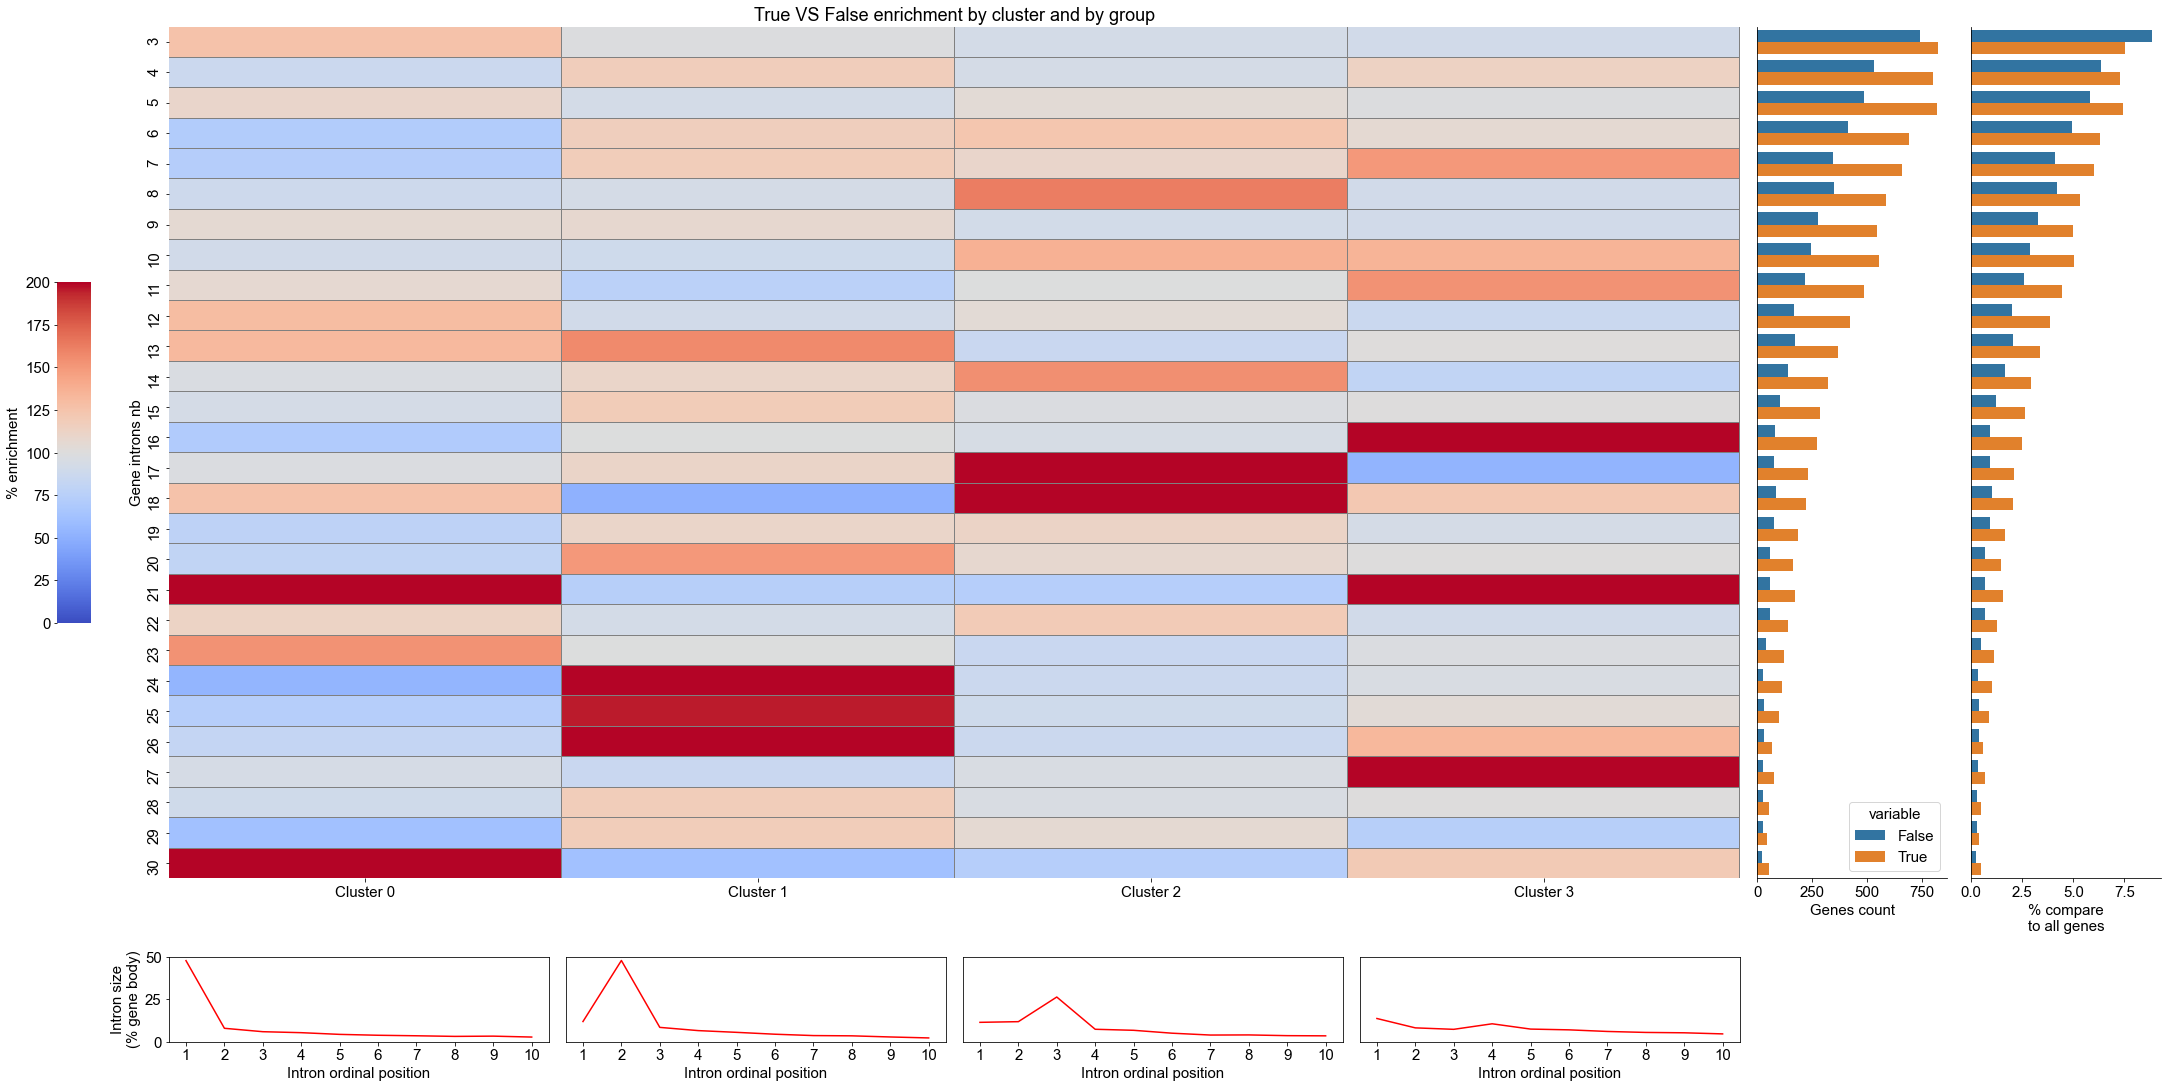

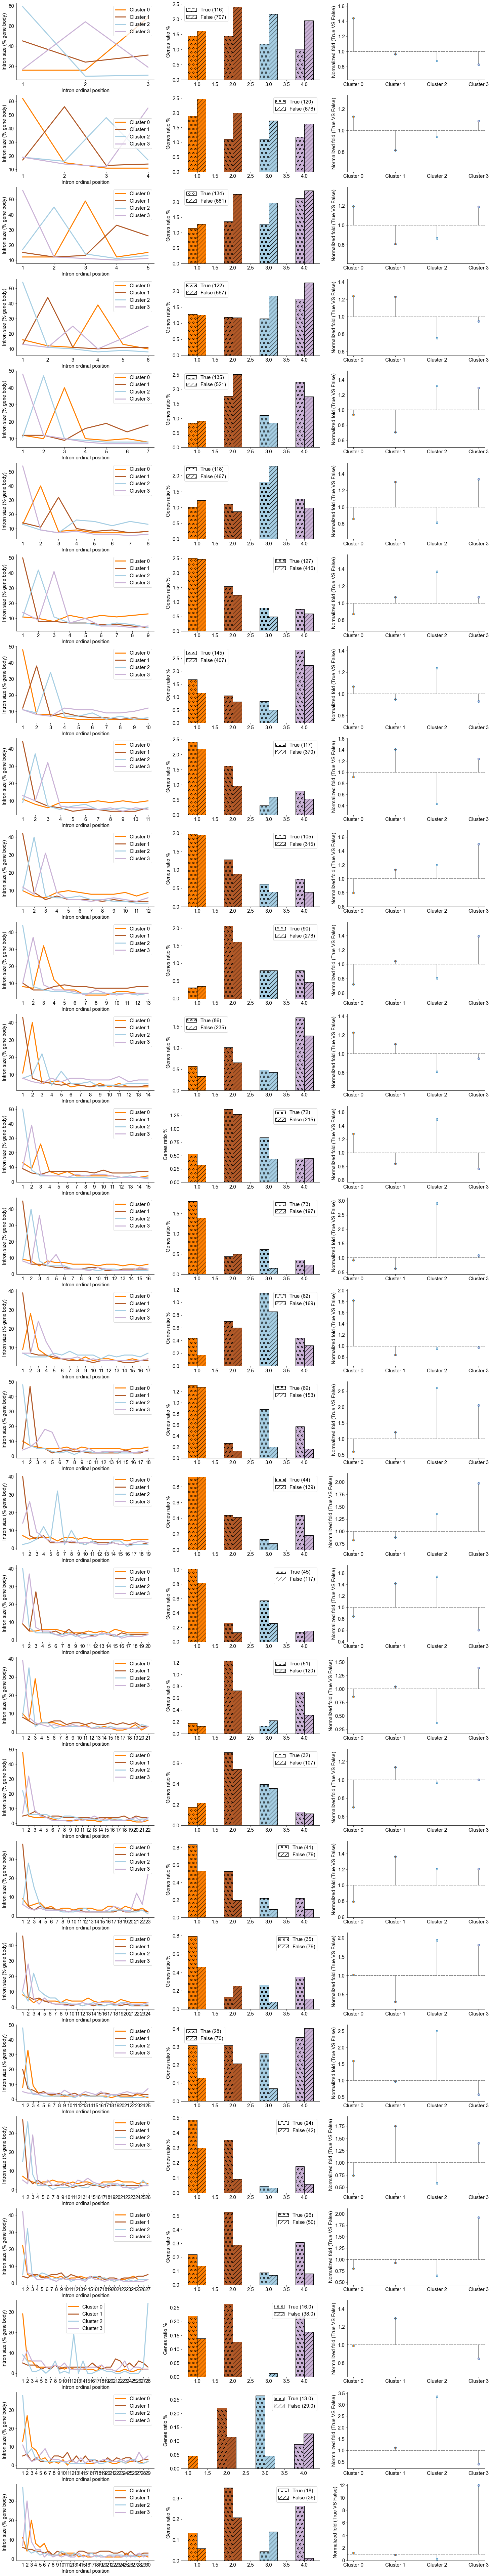

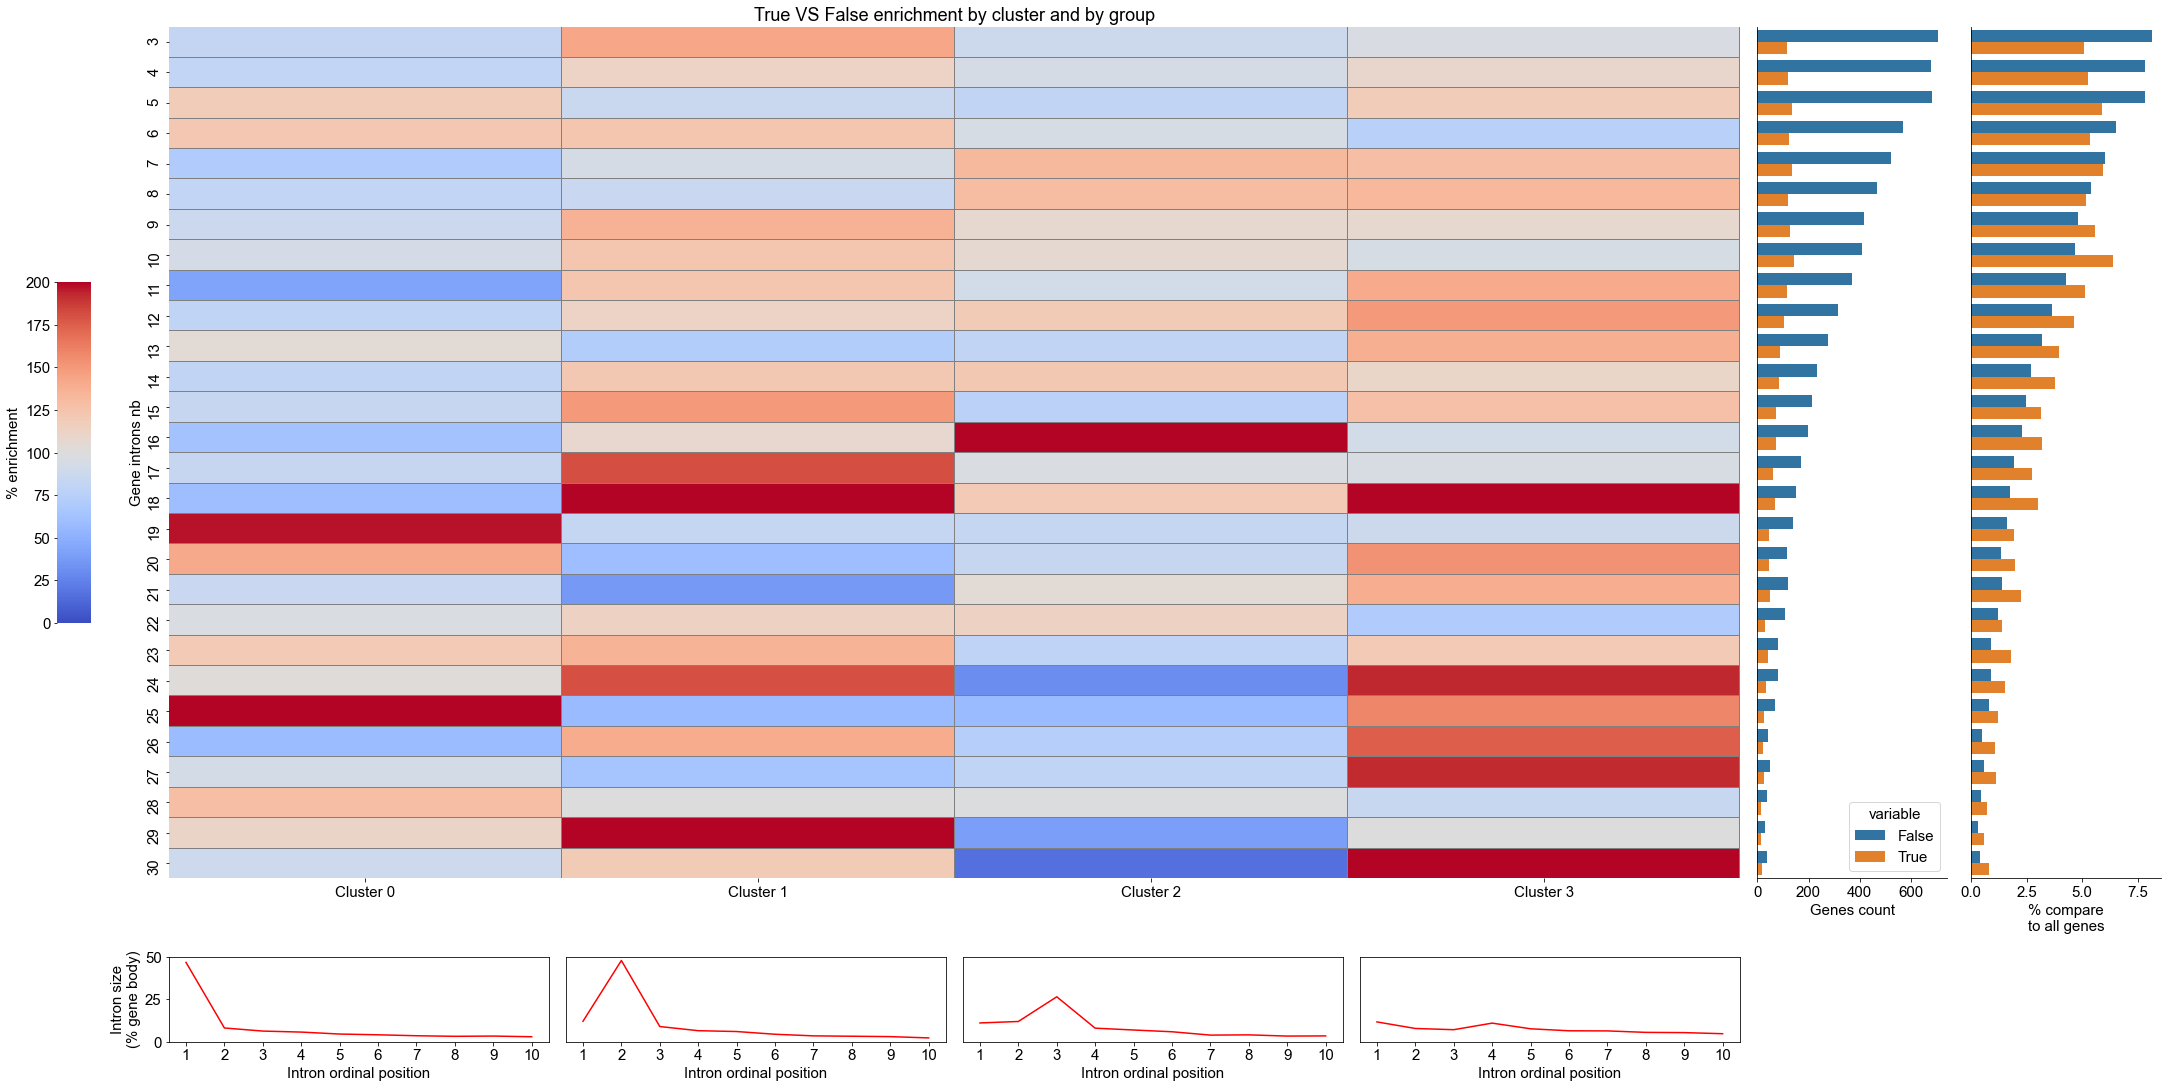

In [372]:
random.seed(1)
colors = sns.color_palette("Paired")
random.shuffle(colors)


conditions = ['Miso', 'dext']

for condition in conditions:


    anti_condition = 'dext_up' if condition == 'dext_down' else 'dext_down'


    df_raw = pd.read_parquet("/gstock/EXOTIC/data/GENOMICS/RefSeq_exons_simple.parquet")


    if 'dext' in condition:

        df_raw = df_raw.loc[df_raw['Miso'] == True]


    df_raw.loc[df_raw['Gene'].isin(dext[(dext['dext_up'] > 0.5) | (dext['dext_down'] < - 0.5)].Gene.unique().tolist()), "dext"] = True
    df_raw.loc[df_raw['Gene'].isin(dext[(dext['dext_up'] > 0.5)].Gene.unique().tolist()), "dext_up"] = True
    df_raw.loc[df_raw['Gene'].isin(dext[(dext['dext_down'] < - 0.5)].Gene.unique().tolist()), "dext_down"] = True
    df_raw[['dext', 'dext_up', 'dext_down']] = df_raw[['dext', 'dext_up', 'dext_down']].fillna(False)


    if 'up' in condition or 'down' in condition: 

        df_raw = df_raw.loc[df_raw[anti_condition] == False]



    df_raw["Introns_lengths"] = df_raw["Introns_ranges"].apply(lambda r: [int(e.split("-")[1]) - int(e.split("-")[0]) for e in r if int(e.split("-")[1]) - int(e.split("-")[0]) > 0 and int(e.split("-")[1]) - int(e.split("-")[0]) < 2e6])
    df_raw['Introns_nb'] = df_raw['Introns_lengths'].str.len()

    d = dict()
    d[False] = 0
    d[True] = 0


    keys = list(range(3,31))
#     keys = [5,10]
    clusters = [4]



    plt.rcParams.update({'font.size' : 15})

    f, ax = plt.subplots(nrows=len(keys), ncols=3, figsize=(25,5*len(keys)))

    print(df_raw[condition].value_counts())


    l_fold_df = list()
    l_clusters_df = list()

    from tqdm import tqdm

    for i, k in tqdm(enumerate(keys)):


        df = df_raw.loc[(df_raw["Introns_nb"] == k)]

        df["Introns_lengths_ratio"] = df["Introns_lengths"].apply(lambda r: pd.Series(pd.Series(r) / pd.Series(r).sum()).round(2).values.tolist())
        df["Introns_lengths_ratio"] = df["Introns_lengths_ratio"].apply(lambda r: r[:k])

        df = df.reset_index(drop=True)
        d[False] += df[condition].value_counts()[False]
        d[True] += df[condition].value_counts()[True]

        for x in ['Introns_lengths_ratio']:

            X_raw = pd.DataFrame.from_records(df[x])

            for cluster in clusters:

                X = X_raw.copy()

                km = KMeans(n_clusters=cluster)
                km.fit(X.values)
                cluster_centers = km.cluster_centers_
                cluster_centers = [[round(sub_e, 2) for sub_e in e] for e in cluster_centers]
                l_clusters_df.append(cluster_centers)


                cluster_map = pd.DataFrame()
                cluster_map["data_index"] = X.index.values
                cluster_map["cluster"] = km.labels_


                X['cluster'] = cluster_map.cluster

                X['Miso'] = df['Miso']
                X[condition] = df[condition]
                X[condition] = X[condition].astype(str)
                X['Strand'] = df['Strand']
                X['Gene'] = df['Gene']
                X['Introns_ranges'] = df['Introns_ranges']
                X['Introns_lengths'] = df['Introns_lengths']


                gb_raw = X.groupby(['cluster'])[condition].value_counts().rename('Count').reset_index().pivot(index='cluster', columns=condition, values='Count')
                gb_raw.loc['Sum'] = gb_raw.sum()

                gb = gb_raw.copy()
                gb.columns = [str(c) for c in gb.columns]


                gb = gb.rename({'False' : 'False_raw', 'True' : 'True_raw'}, axis=1)


                gb['False'] = 100 * (gb['False_raw'] / df_raw[condition].value_counts().loc[False])
                gb['True'] = 100 * (gb['True_raw'] / df_raw[condition].value_counts().loc[True])

                gb['Ratio'] = gb['True'] / gb['False']
                gb['Fold'] = gb['Ratio'] / gb.loc['Sum']['Ratio']

                gb['Total'] = gb['False'] + gb['True']

                l_fold_df.append(gb)

                gb = gb.drop('Sum').reset_index(drop=True)

                legend_lineplot_handles = list()
                legend_lineplot_labels = list()
                for (j, c), color in zip(enumerate(cluster_centers), colors):
                    ax[i][0].plot([str(e) for e in range(1, len(c)+1)], [100*e for e in c], color=color, lw=3)
                    ax[i][0].set_ylabel('Intron size (% gene body)')
                    ax[i][0].set_xlabel('Intron ordinal position')
                    ax[i][0].spines['top'].set_linewidth(0)
                    ax[i][0].spines['right'].set_linewidth(0)

                    legend_lineplot_handles.append(Line2D([0], [0], color=color, lw=3))
                    legend_lineplot_labels.append( "Cluster {}".format(str(j)))

                    if j == cluster-1:
                        ax[i][0].legend(legend_lineplot_handles, legend_lineplot_labels)

                    ax[i][1].bar((j+1) - 0.25/2, gb.loc[j]['True'], color = color, width = 0.25, hatch="o", edgecolor='black')
                    ax[i][1].bar((j+1) + 0.25/2, gb.loc[j]['False'], color = color, width = 0.25, hatch="//", edgecolor='black')
                    ax[i][1].set_ylabel('Genes ratio %')

                    ax[i][1].spines['top'].set_linewidth(0)
                    ax[i][1].spines['right'].set_linewidth(0)

                    ax[i][1].legend(
                        [
                            mpatches.Patch(facecolor="white", hatch="o",  edgecolor='black'),
                            mpatches.Patch(facecolor="white", hatch="//",  edgecolor='black')
                        ],
                        [
                           "True ({})".format(gb_raw.loc['Sum']['True']), "False ({})".format(gb_raw.loc['Sum']['False']), 
                        ]
                    )

                    markerline, stemlines, baseline = ax[i][2].stem(["Cluster {}".format(j)], [gb.loc[j]['Fold']], bottom=1, linefmt = 'grey', use_line_collection=True)
                    markerline.set_markerfacecolor(color)
                    ax[i][2].axhline(1, color='grey', alpha=0.7, ls='--')


                    ax[i][2].set_ylabel('Normalized fold (True VS False)')
                    ax[i][2].spines['top'].set_linewidth(0)
                    ax[i][2].spines['right'].set_linewidth(0)
                    ax[i][2].set_ylim(gb['Fold'].min() - 0.2, gb['Fold'].max() + 0.2)


    fold_df = pd.concat([e.Fold.drop('Sum').sort_index() for e in l_fold_df], axis=1).T.reset_index(drop=True).reset_index().rename({'index' : 'Introns_nb'}, axis=1).fillna(1)
    fold_df['Introns_nb'] = fold_df['Introns_nb'] + 3
    fold_df = fold_df.set_index('Introns_nb')

    data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
    data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
    data = data * 100
    data.to_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment_{}_{}.xlsx'.format(condition, "supequal"))


    # Mass centers
    l = list()
    for i, e in enumerate(l_clusters_df):
        tmp_df_to_add = pd.DataFrame.from_records(e)
        tmp_df_to_add['Introns_nb'] = 3 + i
        l.append(tmp_df_to_add)
    concat = pd.concat(l)
    concat = concat[['Introns_nb'] + list(range(0,30))]
    concat.index.names = ["Cluster"]
    concat.index = [e for e in list(concat.index)]
    concat.to_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition, "supequal"))

    f.savefig('/gstock/EXOTIC/data/CLUSTERING/vertical_figure_{}_{}.png'.format(condition, "supequal"))
    
    

    # Index order
    def return_index(r):
        r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
        return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

    index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
    index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
    index_df = index_df - 1
    # index_df.columns = [int(e) +1 for e in index_df.columns]



    map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
    map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
    map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']

    fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
    fillna = fillna.rename({'index' : 'cluster'}, axis=1)

    fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
    fillna['cluster_new'] = fillna['id'].map(map_d)
    data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
    data_profiles = 100 * data_profiles



    fig3 = plt.figure(constrained_layout=True, figsize=(30,15))
    gs = fig3.add_gridspec(nrows=2, ncols=6, width_ratios = [2,2,2,2,1,1], height_ratios = [10,1])
    ax_heatmap = fig3.add_subplot(gs[0, : -2])
    ax_barplot1 = fig3.add_subplot(gs[0, -2])
    ax_barplot2 = fig3.add_subplot(gs[0, -1])

    ax_cluster1 = fig3.add_subplot(gs[1, 0])
    ax_cluster2 = fig3.add_subplot(gs[1, 1])
    ax_cluster3 = fig3.add_subplot(gs[1, 2])
    ax_cluster4 = fig3.add_subplot(gs[1, 3])
    
    
    


    sns.heatmap(data=data, center=100, vmin=0, vmax=200, cmap='coolwarm', linecolor='grey', lw=0.01, ax=ax_heatmap, cbar_kws={"shrink": .4, "use_gridspec" : False, "location" : "left", 'label' : '% enrichment'})
    ax_heatmap.set_xticklabels(['Cluster {}'.format(i) for i in range(0,4)])
    ax_heatmap.set_ylabel('Gene introns nb')
    ax_heatmap.set_title('{} VS {} enrichment by cluster and by group'.format('True', 'False'))



    concat_gb = pd.concat(l_fold_df).reset_index()
    concat_gb['Introns_nb'] = [sub_e for e in list(range(3,31)) for sub_e in 5*[e]]
    concat_gb_raw = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False_raw', 'True_raw'])
    concat_gb_raw['variable'] = concat_gb_raw['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
    concat_gb_raw['Introns_nb'] = concat_gb_raw['Introns_nb'].astype(str)

    concat_gb_ratio = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False', 'True'])
    concat_gb_ratio['variable'] = concat_gb_ratio['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
    concat_gb_ratio['Introns_nb'] = concat_gb_ratio['Introns_nb'].astype(str)

    

    sns.barplot(data=concat_gb_raw, y='Introns_nb', x='value', hue='variable', ax=ax_barplot1)
    ax_barplot1.set_yticklabels([])
    ax_barplot1.set_ylabel('')
    ax_barplot1.set_xlabel('Genes count')
    ax_barplot1.yaxis.set_ticks_position('none') 
    ax_barplot1.spines['right'].set_linewidth(0)
    ax_barplot1.spines['top'].set_linewidth(0)



    sns.barplot(data=concat_gb_ratio, y='Introns_nb', x='value', hue='variable', ax=ax_barplot2)
    ax_barplot2.set_yticklabels([])
    ax_barplot2.set_ylabel('')
    ax_barplot2.set_xlabel('% compare\nto all genes')
    ax_barplot2.yaxis.set_ticks_position('none') 
    ax_barplot2.spines['right'].set_linewidth(0)
    ax_barplot2.spines['top'].set_linewidth(0)
    ax_barplot2.legend().remove()





    map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
    map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
    map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']

    fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
    fillna = fillna.rename({'index' : 'cluster'}, axis=1)

    fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
    fillna['cluster_new'] = fillna['id'].map(map_d)
    data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
    data_profiles = 100 * data_profiles


    ax_cluster1.plot(list(range(1,11)), data_profiles.loc[0].values, color='red')
    ax_cluster1.set_xlabel('Intron ordinal position')
    ax_cluster1.set_xticks([i for i in range(1,11)])
    ax_cluster1.set_ylim(0,50)
    ax_cluster1.set_ylabel('Intron size\n(% gene body)')
    # ax.yaxis.get_minor_ticks()
    # ax_cluster1.set_xticklabels([str(i) for i in range(1,11)])

    ax_cluster2.plot(list(range(1,11)), data_profiles.loc[1].values, color='red')
    ax_cluster2.set_xlabel('Intron ordinal position')
    ax_cluster2.set_xticks([i for i in range(1,11)])
    ax_cluster2.set_yticks([])

    ax_cluster3.plot(list(range(1,11)), data_profiles.loc[2].values, color='red')
    ax_cluster3.set_xlabel('Intron ordinal position')
    ax_cluster3.set_xticks([i for i in range(1,11)])
    ax_cluster3.set_ylim(0,50)
    ax_cluster3.set_yticks([])

    ax_cluster4.plot(list(range(1,11)), data_profiles.loc[3].values, color='red')
    ax_cluster4.set_xlabel('Intron ordinal position')
    ax_cluster4.set_xticks([i for i in range(1,11)])
    ax_cluster4.set_ylim(0,50)
    ax_cluster4.set_yticks([])
    fig3.savefig('/gstock/EXOTIC/data/CLUSTERING/heatmap_figure_{}_{}.png'.format(condition, "supequal"))
    

In [373]:
index_df

level_1     0  1  2  3
Introns_nb            
3           2  3  0  1
4           0  1  2  3
5           3  2  0  1
6           2  1  3  0
7           3  2  0  1
8           3  0  1  2
9           1  2  3  0
10          0  1  2  3
11          1  2  3  0
12          1  2  3  0
13          2  3  0  1
14          1  0  2  3
15          2  3  0  1
16          1  2  3  0
17          1  0  3  2
18          2  1  3  0
19          1  3  3  0
20          2  3  1  0
21          3  2  0  1
22          0  3  3  1
23          1  2  2  0
24          1  3  2  0
25          2  0  0  1
26          1  2  3  0
27          3  2  1  0
28          0  3  0  1
29          2  0  0  1
30          2  3  0  1

[]

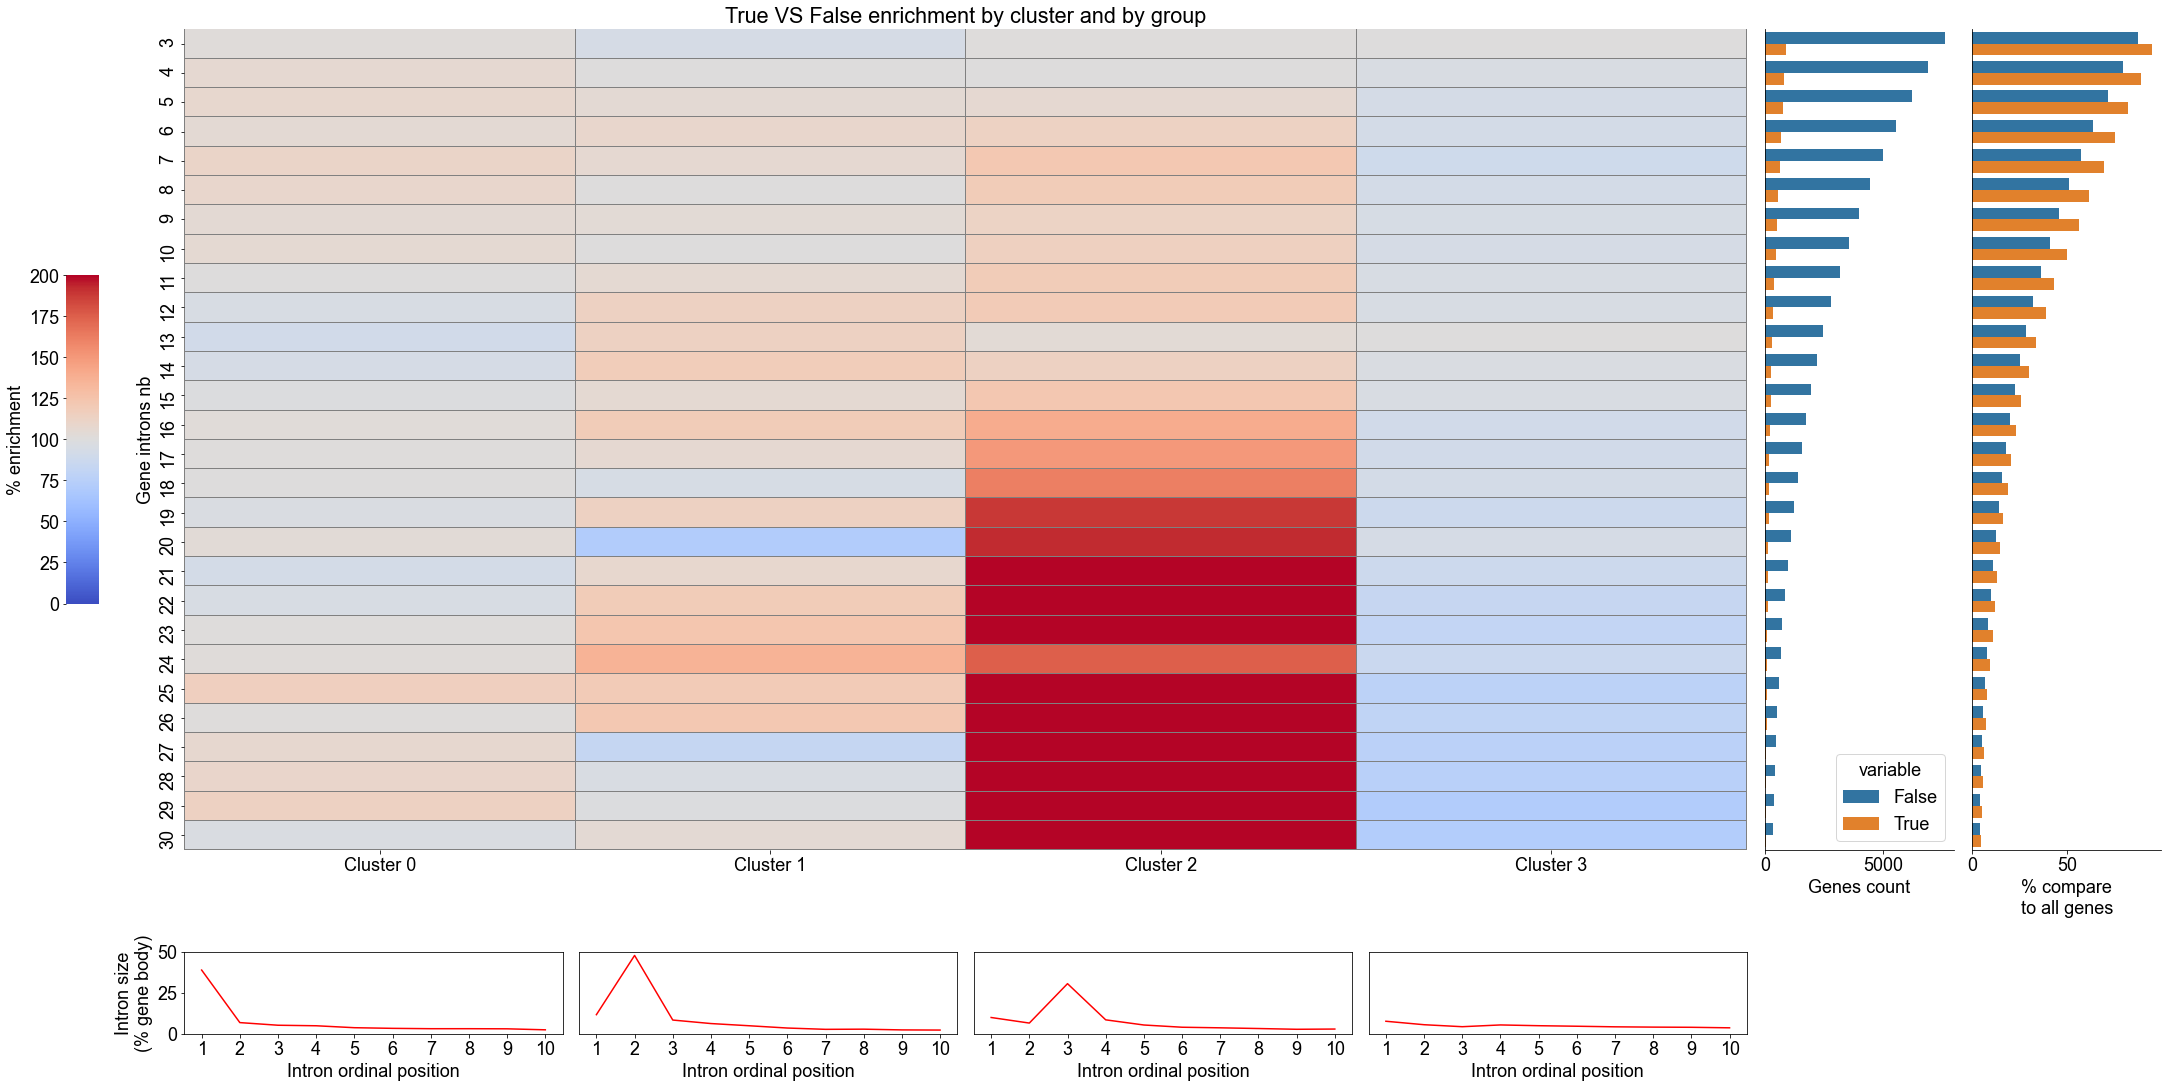

In [367]:
# Mass centers
l = list()
for i, e in enumerate(l_clusters_df):
    tmp_df_to_add = pd.DataFrame.from_records(e)
    tmp_df_to_add['Introns_nb'] = 3 + i
    l.append(tmp_df_to_add)
concat = pd.concat(l)
concat = concat[['Introns_nb'] + list(range(0,30))]
concat.index.names = ["Cluster"]
concat.index = [e for e in list(concat.index)]


# Index order
def return_index(r):
    r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
    return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
index_df = index_df - 1
# index_df.columns = [int(e) +1 for e in index_df.columns]


plt.rcParams.update({'font.size' : 18})

fig3 = plt.figure(constrained_layout=True, figsize=(30,15))
gs = fig3.add_gridspec(nrows=2, ncols=6, width_ratios = [2,2,2,2,1,1], height_ratios = [10,1])
ax_heatmap = fig3.add_subplot(gs[0, : -2])
ax_barplot1 = fig3.add_subplot(gs[0, -2])
ax_barplot2 = fig3.add_subplot(gs[0, -1])

ax_cluster1 = fig3.add_subplot(gs[1, 0])
ax_cluster2 = fig3.add_subplot(gs[1, 1])
ax_cluster3 = fig3.add_subplot(gs[1, 2])
ax_cluster4 = fig3.add_subplot(gs[1, 3])



fold_df = pd.concat([e.Fold.drop('Sum').sort_index() for e in l_fold_df], axis=1).T.reset_index(drop=True).reset_index().rename({'index' : 'Introns_nb'}, axis=1).fillna(1)
fold_df['Introns_nb'] = fold_df['Introns_nb'] + 3
fold_df = fold_df.set_index('Introns_nb')

data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
data = data * 100
# data.to_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment.xlsx')




sns.heatmap(data=data, center=100, vmin=0, vmax=200, cmap='coolwarm', linecolor='grey', lw=0.01, ax=ax_heatmap, cbar_kws={"shrink": .4, "use_gridspec" : False, "location" : "left", 'label' : '% enrichment'})
ax_heatmap.set_xticklabels(['Cluster {}'.format(i) for i in range(0,4)])
ax_heatmap.set_ylabel('Gene introns nb')
ax_heatmap.set_title('{} VS {} enrichment by cluster and by group'.format('True', 'False'))



concat_gb = pd.concat(l_fold_df).reset_index()
concat_gb['Introns_nb'] = [sub_e for e in list(range(3,31)) for sub_e in 5*[e]]
concat_gb_raw = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False_raw', 'True_raw'])
concat_gb_raw['variable'] = concat_gb_raw['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
concat_gb_raw['Introns_nb'] = concat_gb_raw['Introns_nb'].astype(str)

concat_gb_ratio = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False', 'True'])
concat_gb_ratio['variable'] = concat_gb_ratio['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
concat_gb_ratio['Introns_nb'] = concat_gb_ratio['Introns_nb'].astype(str)

data_test = pd.DataFrame([{'Siso' : i, 'Miso': j, "x" : x} for x, i, j in zip(range(3,31), range(10,1000,10), range(20,2000,20))]).melt(id_vars='x', value_vars=['Siso', 'Miso'])
data_test['x'] = data_test['x'].astype(str)

sns.barplot(data=concat_gb_raw, y='Introns_nb', x='value', hue='variable', ax=ax_barplot1)
ax_barplot1.set_yticklabels([])
ax_barplot1.set_ylabel('')
ax_barplot1.set_xlabel('Genes count')
ax_barplot1.yaxis.set_ticks_position('none') 
ax_barplot1.spines['right'].set_linewidth(0)
ax_barplot1.spines['top'].set_linewidth(0)



sns.barplot(data=concat_gb_ratio, y='Introns_nb', x='value', hue='variable', ax=ax_barplot2)
ax_barplot2.set_yticklabels([])
ax_barplot2.set_ylabel('')
ax_barplot2.set_xlabel('% compare\nto all genes')
ax_barplot2.yaxis.set_ticks_position('none') 
ax_barplot2.spines['right'].set_linewidth(0)
ax_barplot2.spines['top'].set_linewidth(0)
ax_barplot2.legend().remove()





map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']

fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
fillna = fillna.rename({'index' : 'cluster'}, axis=1)

fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
fillna['cluster_new'] = fillna['id'].map(map_d)
data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
data_profiles = 100 * data_profiles


ax_cluster1.plot(list(range(1,11)), data_profiles.loc[0].values, color='red')
ax_cluster1.set_xlabel('Intron ordinal position')
ax_cluster1.set_xticks([i for i in range(1,11)])
ax_cluster1.set_ylim(0,50)
ax_cluster1.set_ylabel('Intron size\n(% gene body)')
# ax.yaxis.get_minor_ticks()
# ax_cluster1.set_xticklabels([str(i) for i in range(1,11)])

ax_cluster2.plot(list(range(1,11)), data_profiles.loc[1].values, color='red')
ax_cluster2.set_xlabel('Intron ordinal position')
ax_cluster2.set_xticks([i for i in range(1,11)])
ax_cluster2.set_yticks([])

ax_cluster3.plot(list(range(1,11)), data_profiles.loc[2].values, color='red')
ax_cluster3.set_xlabel('Intron ordinal position')
ax_cluster3.set_xticks([i for i in range(1,11)])
ax_cluster3.set_ylim(0,50)
ax_cluster3.set_yticks([])

ax_cluster4.plot(list(range(1,11)), data_profiles.loc[3].values, color='red')
ax_cluster4.set_xlabel('Intron ordinal position')
ax_cluster4.set_xticks([i for i in range(1,11)])
ax_cluster4.set_ylim(0,50)
ax_cluster4.set_yticks([])



In [354]:
l_df_fold_final = list()
conditions = ['Miso']
for condition in conditions:
    concat = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition,'supequal')).drop(['Unnamed: 0'], axis=1)
    concat['condition'] = condition
    concat['cluster'] = [sub_e for e in [range(0,4)] * 28 for sub_e in e]
    concat

    # Index order
    def return_index(r):
        r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
        return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

    index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
    index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
    index_df = index_df - 1
    # index_df.columns = [int(e) +1 for e in index_df.columns]

    data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
    data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
    data = data * 100
    data = data.mean()
    l_df_fold_final.append(pd.DataFrame(data))
tmp = pd.concat(l_df_fold_final, axis=1)
tmp.columns = conditions
tmp

Introns_nb     0     1     2     3     4     5     6     7     8  ...  \
0             3  0.15  0.49  0.12   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1             3  0.16  0.13  0.47   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2             3  0.56  0.11  0.10   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3             3  0.12  0.09  0.08   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4             4  0.13  0.44  0.10  0.10   NaN   NaN   NaN   NaN   NaN  ...   
..          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
107          29  0.06  0.04  0.03  0.03  0.03  0.03  0.03  0.03  0.03  ...   
108          30  0.06  0.04  0.03  0.03  0.03  0.03  0.03  0.03  0.02  ...   
109          30  0.33  0.05  0.04  0.03  0.03  0.02  0.02  0.02  0.02  ...   
110          30  0.08  0.30  0.06  0.05  0.03  0.03  0.02  0.02  0.02  ...   
111          30  0.10  0.06  0.26  0.11  0.04  0.03  0.04  0.02  0.02  ...   

       22    23    24    25    26    27    28    29  condition  cluster  
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        0  
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        1  
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        2  
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        3  
4     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        0  
..    ...   ...   ...   ...   ...   ...   ...   ...        ...      ...  
107  0.02  0.02  0.02  0.02  0.03  0.02  0.02   NaN       Miso        3  
108  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02       Miso        0  
109  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01       Miso        1  
110  0.01  0.01  0.01  0.02  0.02  0.01  0.01  0.01       Miso        2  
111  0.01  0.01  0.01  0.02  0.01  0.01  0.01  0.01       Miso        3  

[112 rows x 33 columns]

In [305]:
l_df_fold_final = list()
conditions = ['Miso', 'dext', 'dext_up', 'dext_down']
for condition in conditions:
    concat = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition,'supequal')).drop(['Unnamed: 0'], axis=1)
    concat['condition'] = condition
    concat['cluster'] = [sub_e for e in [range(0,4)] * 28 for sub_e in e]

    # Index order
    def return_index(r):
        r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
        return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

    index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
    index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
    index_df = index_df - 1
    # index_df.columns = [int(e) +1 for e in index_df.columns]

    data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
    data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
    data = data * 100
    data = data.mean()
    l_df_fold_final.append(pd.DataFrame(data))
tmp = pd.concat(l_df_fold_final, axis=1)
tmp.columns = conditions
tmp

Miso        dext     dext_up   dext_down
0  139.274079  130.556891  123.688866  102.737011
1  135.319525  116.727723  131.006200  106.987616
2  111.165506  135.182259  150.091555  208.443065
3  121.277946  124.570182  108.494438   88.869365

In [274]:
l_df_fold_final = list()
for condition in ['Miso', 'dext', 'dext_down', 'dext_up']:
    df = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition,'supequal')).drop(['Unnamed: 0'], axis=1)
    df['condition'] = condition
    df['cluster'] = [sub_e for e in [range(0,4)] * 28 for sub_e in e]
    l_df_fold_final.append(df)
    
df_fold = pd.concat(l_df_fold_final)
df_fold

Introns_nb     0     1     2     3     4     5     6     7     8  ...  \
0             3  0.15  0.49  0.12   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1             3  0.16  0.13  0.47   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2             3  0.56  0.11  0.10   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3             3  0.12  0.09  0.08   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4             4  0.13  0.44  0.10  0.10   NaN   NaN   NaN   NaN   NaN  ...   
..          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
107          29  0.12  0.06  0.25  0.08  0.04  0.04  0.04  0.02  0.02  ...   
108          30  0.34  0.05  0.04  0.04  0.03  0.02  0.02  0.03  0.02  ...   
109          30  0.05  0.04  0.03  0.03  0.03  0.03  0.03  0.03  0.02  ...   
110          30  0.07  0.35  0.07  0.05  0.03  0.02  0.02  0.02  0.02  ...   
111          30  0.10  0.05  0.25  0.10  0.05  0.04  0.04  0.02  0.02  ...   

       22    23    24    25    26    27    28    29  condition  cluster  
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        0  
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        1  
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        2  
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        3  
4     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       Miso        0  
..    ...   ...   ...   ...   ...   ...   ...   ...        ...      ...  
107  0.01  0.01  0.02  0.01  0.01  0.01  0.01   NaN    dext_up        3  
108  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.02    dext_up        0  
109  0.02  0.03  0.02  0.02  0.02  0.02  0.03  0.02    dext_up        1  
110  0.02  0.01  0.01  0.01  0.02  0.01  0.01  0.01    dext_up        2  
111  0.01  0.01  0.02  0.01  0.02  0.01  0.01  0.01    dext_up        3  

[448 rows x 33 columns]

In [368]:

l_df_fold_final = list()
conditions = ['Miso', 'dext', 'dext_up', 'dext_down']
conditions = ['dext_down']
for condition in conditions:
    fold = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment_{}_{}.xlsx'.format(condition,'supequal'))

fold
#     concat = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition,'supequal')).drop(['Unnamed: 0'], axis=1)
# #     concat['condition'] = condition

#     # Index order
#     def return_index(r):
#         r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
#         return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

#     index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
#     index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
#     index_df = index_df - 1
#     # index_df.columns = [int(e) +1 for e in index_df.columns]

# # data
# # fold
#     data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
#     data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
#     data = data * 100
#     data = data.mean()
# # data
#     l_df_fold_final.append(pd.DataFrame(data))
# df_fold = pd.concat(l_df_fold_final, axis=1)
# df_fold.columns = conditions
# df_fold = df_fold.rename({'index' : 'condition'}, axis=1)

    
# # df_fold = pd.concat(l_df_fold_final)
# # df_fold = df_fold.drop(['Introns_nb'], axis=1).groupby('condition').mean()
# # df_fold = df_fold - 100
# df_fold = df_fold.T.reset_index()
# df_fold = df_fold.rename({'index' : 'condition'}, axis=1)
# df_fold

Introns_nb           0           1           2           3
0            3  100.765260  101.707971  101.030587   94.272629
1            4  100.395279  106.446524  100.290409   96.430033
2            5  107.835272  106.822011  104.974869   93.632814
3            6  113.340164  108.931867  105.206380   92.520372
4            7  106.447797  111.045934   89.550785  122.005321
5            8   92.413241  118.859911  109.270246  100.709508
6            9  105.114422  104.585565   94.616514  112.780462
7           10  115.334773   94.494919  100.373448  106.150452
8           11  100.583822  105.620278  119.210844   95.360700
9           12   95.852725   95.927234  119.723384  114.241314
10          13   91.002950  114.776269  104.082321  100.270856
11          14  114.329433   97.041166  117.979798   93.970909
12          15  106.117833   96.108677   98.597206  122.935159
13          16  119.161079  140.194104   90.968091  102.614888
14          17  106.591768  150.298308  101.533488   91.151601
15          18   94.549959  100.241315   92.706747  161.785485
16          19  114.552980   96.922344  188.675497   87.721173
17          20  192.481025   94.309852   71.602941  103.244275
18          21   88.147020  217.505635  107.997590   92.416557
19          22   95.744199  222.628806  119.125940   84.157464
20          23  233.199916   81.916263  123.497420  100.785251
21          24  136.698358  175.369604   86.011803  101.811798
22          25  271.309771   77.712273  119.560238  115.911686
23          26  101.503759   79.838710  375.000000  122.448980
24          27  520.000000   77.173145  107.804878   82.978723
25          28   96.759259  464.444444  109.538784   75.299034
26          29   71.351931   98.958333  395.833333  114.261168
27          30   72.136290   97.598584  565.116279  105.326332

In [327]:
concat

Introns_nb     0     1     2     3     4     5     6     7     8  ...  \
0             3  0.15  0.49  0.12   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1             3  0.16  0.13  0.47   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2             3  0.56  0.11  0.10   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3             3  0.12  0.09  0.08   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4             4  0.13  0.44  0.10  0.10   NaN   NaN   NaN   NaN   NaN  ...   
..          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
107          29  0.06  0.04  0.03  0.03  0.03  0.03  0.03  0.03  0.03  ...   
108          30  0.06  0.04  0.03  0.03  0.03  0.03  0.03  0.03  0.02  ...   
109          30  0.33  0.05  0.04  0.03  0.03  0.02  0.02  0.02  0.02  ...   
110          30  0.08  0.30  0.06  0.05  0.03  0.03  0.02  0.02  0.02  ...   
111          30  0.10  0.06  0.26  0.11  0.04  0.03  0.04  0.02  0.02  ...   

       20    21    22    23    24    25    26    27    28    29  
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
107  0.02  0.02  0.02  0.02  0.02  0.02  0.03  0.02  0.02   NaN  
108  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  
109  0.01  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
110  0.01  0.01  0.01  0.01  0.01  0.02  0.02  0.01  0.01  0.01  
111  0.01  0.01  0.01  0.01  0.01  0.02  0.01  0.01  0.01  0.01  

[112 rows x 31 columns]

In [336]:

l_df_intron = list()
l_profiles = list()

conditions = ['Miso', 'dext', 'dext_up', 'dext_down']
for condition in conditions:
    concat = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition,'supequal')).drop(['Unnamed: 0'], axis=1)
    def return_index(r):
        r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
        return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

    index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
    index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
    index_df = index_df - 1
    
    
    map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
    map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
    map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']
    
    concat = concat[['Introns_nb'] + list(range(0,30))]
    concat.index.names = ["Cluster"]
    concat.index = [e for e in list(concat.index)]

    fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
    fillna = fillna.rename({'index' : 'cluster'}, axis=1)

    fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
    fillna['cluster_new'] = fillna['id'].map(map_d)
    data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
    data_profiles = 100 * data_profiles
    data_profiles['condition'] = condition
    l_profiles.append(data_profiles)
data_profiles = pd.concat(l_profiles)
data_profiles = data_profiles.groupby('cluster_new').mean()
data_profiles

0      1      2    3    4    5    6    7    8      9
cluster_new                                                          
0.0          55.50  11.00   9.50  5.0  4.0  3.5  3.0  3.0  3.0  2.625
1.0          14.25  48.00  11.75  5.0  4.0  3.5  3.0  3.0  3.0  2.625
2.0          15.25  12.25  47.50  5.0  4.0  3.5  3.0  3.0  3.0  2.625
3.0          12.00   8.50   8.00  5.0  4.0  3.5  3.0  3.0  3.0  2.625

In [329]:
# Mass centers
l = list()
for i, e in enumerate(l_clusters_df):
    tmp_df_to_add = pd.DataFrame.from_records(e)
    tmp_df_to_add['Introns_nb'] = 3 + i
    l.append(tmp_df_to_add)
concat = pd.concat(l)
concat = concat[['Introns_nb'] + list(range(0,30))]
concat.index.names = ["Cluster"]
concat.index = [e for e in list(concat.index)]

fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
fillna = fillna.rename({'index' : 'cluster'}, axis=1)

fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
fillna['cluster_new'] = fillna['id'].map(map_d)
data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
data_profiles = 100 * data_profiles
data_profiles

0          1          2         3         4         5  \
cluster_new                                                                  
0.0          17.888889  12.037037  15.703704  6.333333  4.703704  4.037037   
1.0          14.040000  12.280000  15.720000  6.720000  5.000000  3.880000   
2.0          15.821429  12.642857   9.892857  6.214286  4.607143  3.964286   
3.0          16.964286  17.321429   6.500000  5.071429  4.392857  3.678571   

                    6         7         8         9  
cluster_new                                          
0.0          3.666667  3.333333  3.037037  2.888889  
1.0          3.400000  3.320000  3.040000  2.800000  
2.0          3.535714  3.535714  3.357143  3.107143  
3.0          3.357143  3.250000  3.035714  2.857143

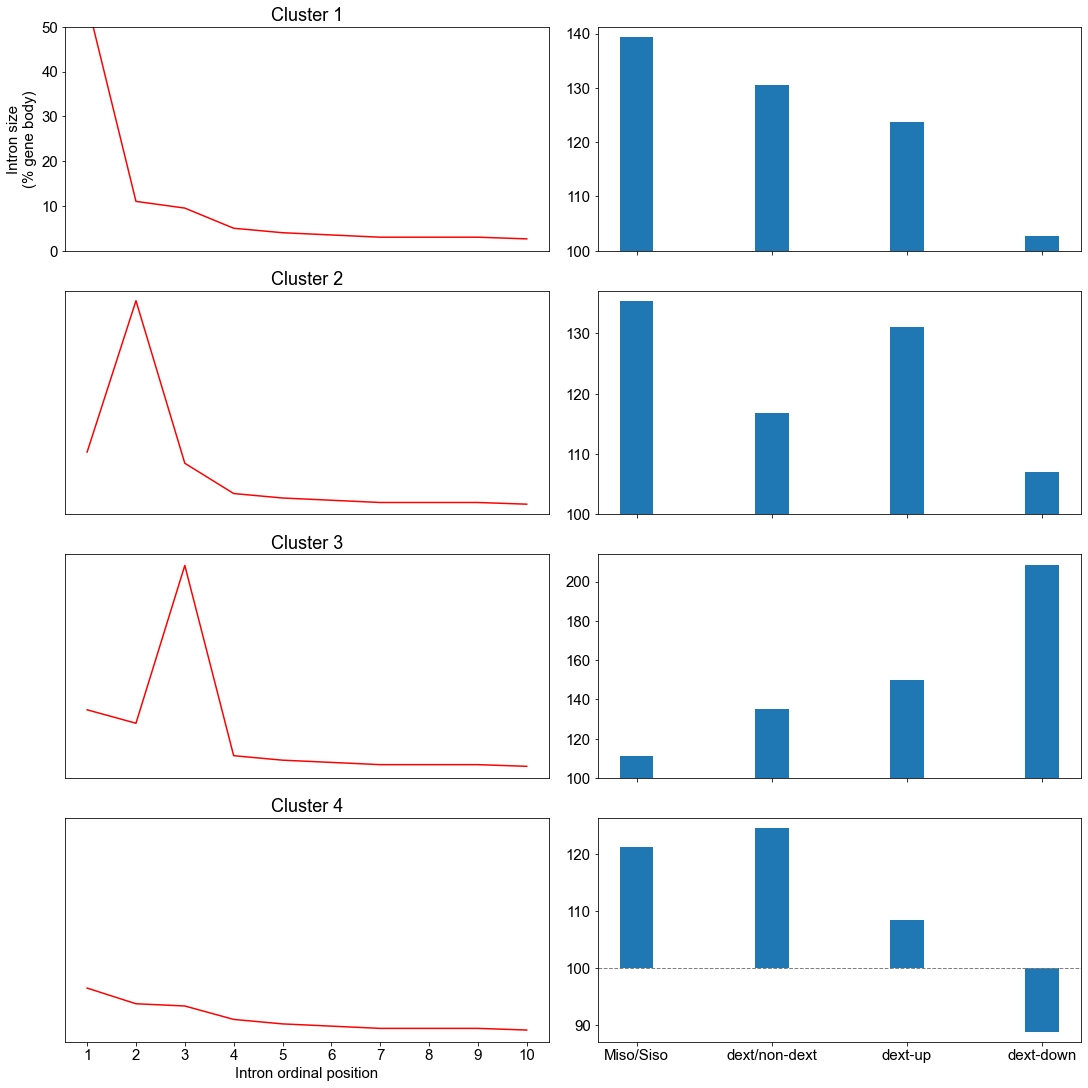

In [337]:

fig3 = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig3.add_gridspec(nrows=4, ncols=2, width_ratios = [1,1], height_ratios = [1,1,1,1])
ax_cluster1 = fig3.add_subplot(gs[0,0])
ax_cluster2 = fig3.add_subplot(gs[1,0])
ax_cluster3 = fig3.add_subplot(gs[2,0])
ax_cluster4 = fig3.add_subplot(gs[3,0])

ax_fold1 = fig3.add_subplot(gs[0,1])
ax_fold2 = fig3.add_subplot(gs[1,1])
ax_fold3 = fig3.add_subplot(gs[2,1])
ax_fold4 = fig3.add_subplot(gs[3,1])


l_df_intron = list()
l_profiles = list()

conditions = ['Miso', 'dext', 'dext_up', 'dext_down']
for condition in conditions:
    concat = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/mass_center_matrix_{}_{}.xlsx'.format(condition,'supequal')).drop(['Unnamed: 0'], axis=1)
    def return_index(r):
        r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
        return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

    index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
    index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
    index_df = index_df - 1
    
    
    map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
    map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
    map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']
    
    concat = concat[['Introns_nb'] + list(range(0,30))]
    concat.index.names = ["Cluster"]
    concat.index = [e for e in list(concat.index)]

    fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
    fillna = fillna.rename({'index' : 'cluster'}, axis=1)

    fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
    fillna['cluster_new'] = fillna['id'].map(map_d)
    data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
    data_profiles = 100 * data_profiles
    data_profiles['condition'] = condition

    l_profiles.append(data_profiles)
    
data_profiles = pd.concat(l_profiles).reset_index()
data_profiles = data_profiles.groupby('cluster_new').mean()


ax_cluster1.plot(list(range(1,11)), data_profiles.loc[0].values, color='red')
ax_cluster1.set_xlabel('')
ax_cluster1.set_xticks([])
ax_cluster1.set_ylim(0,50)
ax_cluster1.set_ylabel('Intron size\n(% gene body)')
ax_cluster1.set_title('Cluster 1')
# ax.yaxis.get_minor_ticks()
# ax_cluster1.set_xticklabels([str(i) for i in range(1,11)])

ax_cluster2.plot(list(range(1,11)), data_profiles.loc[1].values, color='red')
ax_cluster2.set_xlabel('')
ax_cluster2.set_xticks([])
ax_cluster2.set_yticks([])
ax_cluster2.set_title('Cluster 2')

ax_cluster3.plot(list(range(1,11)), data_profiles.loc[2].values, color='red')
ax_cluster3.set_xlabel('')
ax_cluster3.set_xticks([])
ax_cluster3.set_ylim(0,50)
ax_cluster3.set_yticks([])
ax_cluster3.set_title('Cluster 3')


ax_cluster4.plot(list(range(1,11)), data_profiles.loc[3].values, color='red')
ax_cluster4.set_xlabel('Intron ordinal position')
ax_cluster4.set_xticks([i for i in range(1,11)])
ax_cluster4.set_ylim(0,50)
ax_cluster4.set_yticks([])
ax_cluster4.set_title('Cluster 4')












ax_fold1.bar(df_fold.condition, df_fold[0], width=0.25, bottom=100)
ax_fold1.set_xlabel('')
ax_fold1.set_xticklabels([])
ax_fold1.axhline(100, lw=1, ls='--', color='grey')

ax_fold2.bar(df_fold.condition, df_fold[1], width=0.25, bottom=100)
ax_fold2.set_xlabel('')
ax_fold2.set_xticklabels([])
ax_fold2.axhline(100, lw=1, ls='--', color='grey')

ax_fold3.bar(df_fold.condition, df_fold[2], width=0.25, bottom=100)
ax_fold3.set_xlabel('')
ax_fold3.set_xticklabels([])
ax_fold3.axhline(100, lw=1, ls='--', color='grey')

ax_fold4.bar(df_fold.condition, df_fold[3], width=0.25, bottom=100)
ax_fold4.set_xlabel('')
ax_fold4.set_xticklabels(["Miso/Siso", "dext/non-dext", "dext-up", "dext-down"])
ax_fold4.axhline(100, lw=1, ls='--', color='grey')


In [452]:
data_barplot = pd.read_excel("/gstock/EXOTIC/data/CLUSTERING/data_barplot_{}.xlsx".format("supequal"))
data_profiles = pd.read_excel("/gstock/EXOTIC/data/CLUSTERING/data_profiles_{}.xlsx".format("supequal"))
data_heatmap = pd.read_excel("/gstock/EXOTIC/data/CLUSTERING/data_heatmap_{}.xlsx".format("supequal"))

In [453]:
data_heatmap

Condition  Introns_nb           0           1           2           3
0        Miso           3   91.687018  128.187252  116.268921   95.842182
1        Miso           4   89.179625  130.818197  119.436770   96.182021
2        Miso           5   84.699599  118.102790  110.820505  101.502616
3        Miso           6   85.728653  121.231684  120.290949   98.796709
4        Miso           7   83.662399  112.061190  100.209859  106.026441
..        ...         ...         ...         ...         ...         ...
107   dext_up          26  120.440829   60.383614  206.310680   86.112284
108   dext_up          27  118.685332   77.419355  182.991202   86.763070
109   dext_up          28  110.241758   81.960784  211.402299   86.555556
110   dext_up          29  104.899931   91.787440  189.905047   88.301841
111   dext_up          30   93.635671   81.250000  251.367188   88.051892

[112 rows x 6 columns]

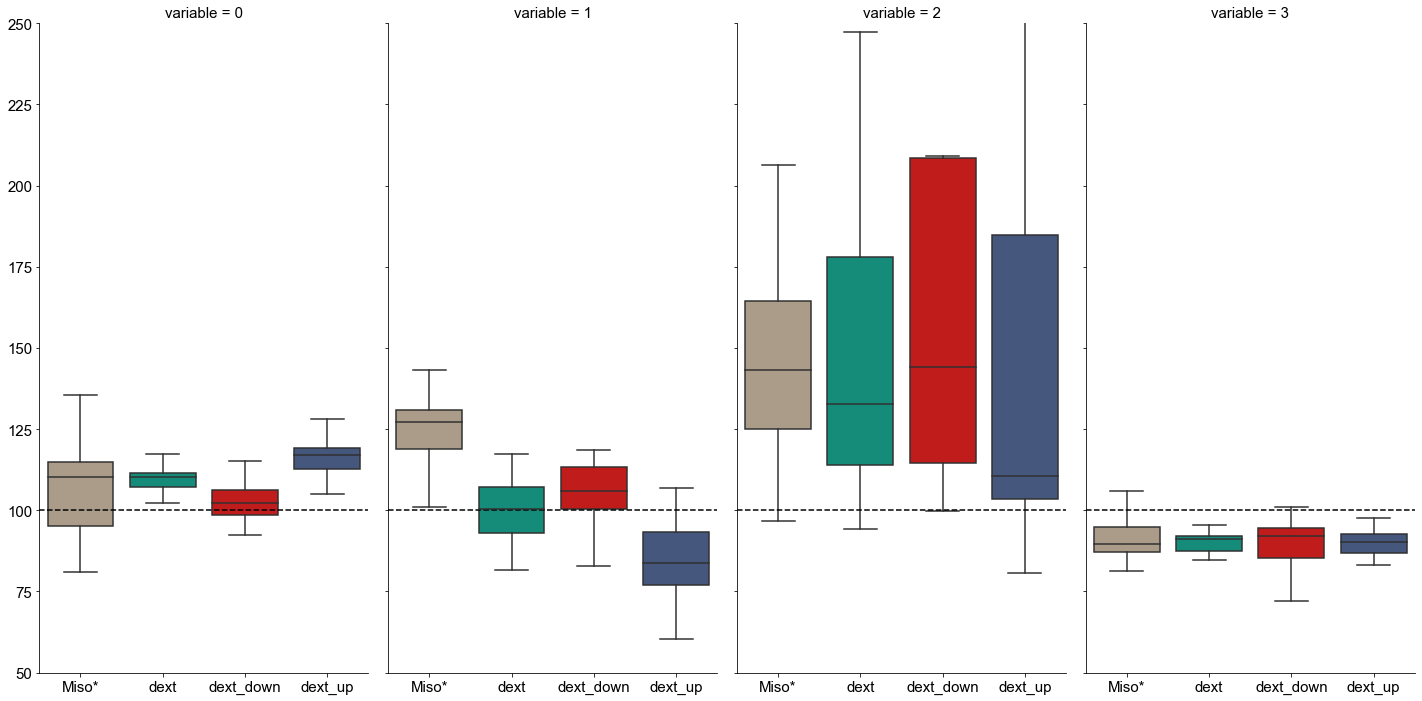

In [454]:
test = data_heatmap.melt(id_vars=['Condition'], value_vars=[0,1,2,3])
test['Condition'] = test['Condition'].replace('Miso', 'Miso*')
g = sns.FacetGrid(data=test, col='variable', sharey=True, height=10, aspect=0.5)
g.map_dataframe(sns.boxplot, x='Condition', y='value', showfliers=False, palette=['#B09C85', '#00A087', '#DC0000', '#3C5488'])
# g.map_dataframe(sns.catplot, x='Condition', y='value', palette=['#B09C85', '#00A087', '#DC0000', '#3C5488'])
for ax in g.axes.ravel():
    ax.axhline(100, ls='--', color='black')
#     ax.axvline(0.5, ls='-', color='black')
    ax.set_ylim(50,250)

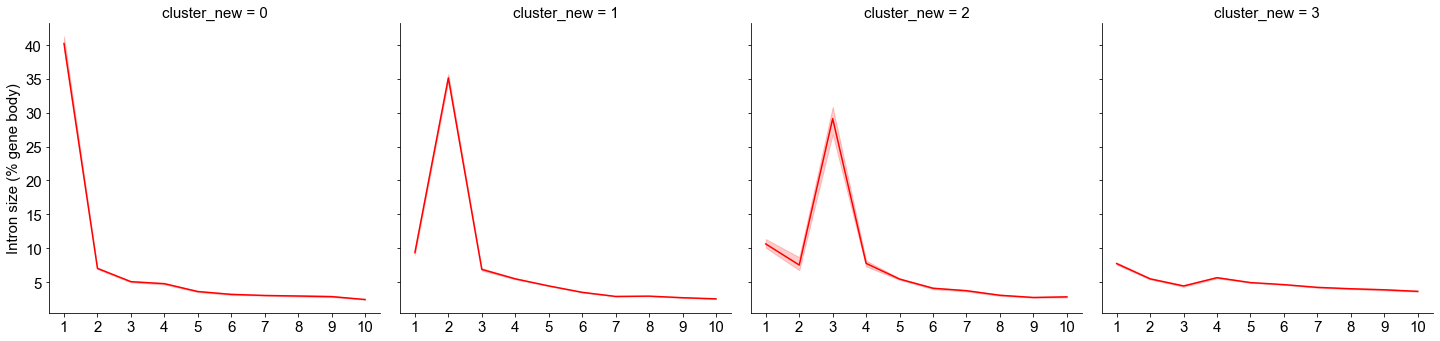

In [455]:
test = data_profiles.melt(id_vars=['Condition', 'cluster_new'], value_vars=list(range(0,10)))
test['variable'] = test['variable'].astype(str)
test


g = sns.FacetGrid(data=test, col='cluster_new', sharey=True, height=5, aspect=1)
g.map_dataframe(sns.lineplot, x='variable', y='value', color = 'red')
for j, ax in enumerate(g.axes.ravel()):
    ax.set_xticklabels(list(range(1,11)))
    if j == 0:
        ax.set_ylabel('Intron size (% gene body)')

In [150]:
fold_df = pd.concat([e.Fold.drop('Sum').sort_index() for e in l_fold_df], axis=1).T.reset_index(drop=True).reset_index().rename({'index' : 'Introns_nb'}, axis=1).fillna(1)
fold_df['Introns_nb'] = fold_df['Introns_nb'] + 3
fold_df = fold_df.set_index('Introns_nb')

data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
data = data * 100
# data.to_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment.xlsx')
pd.DataFrame(data.mean()).T

0          1           2           3
0  116.637716  131.91639  107.896209  119.982491

[]

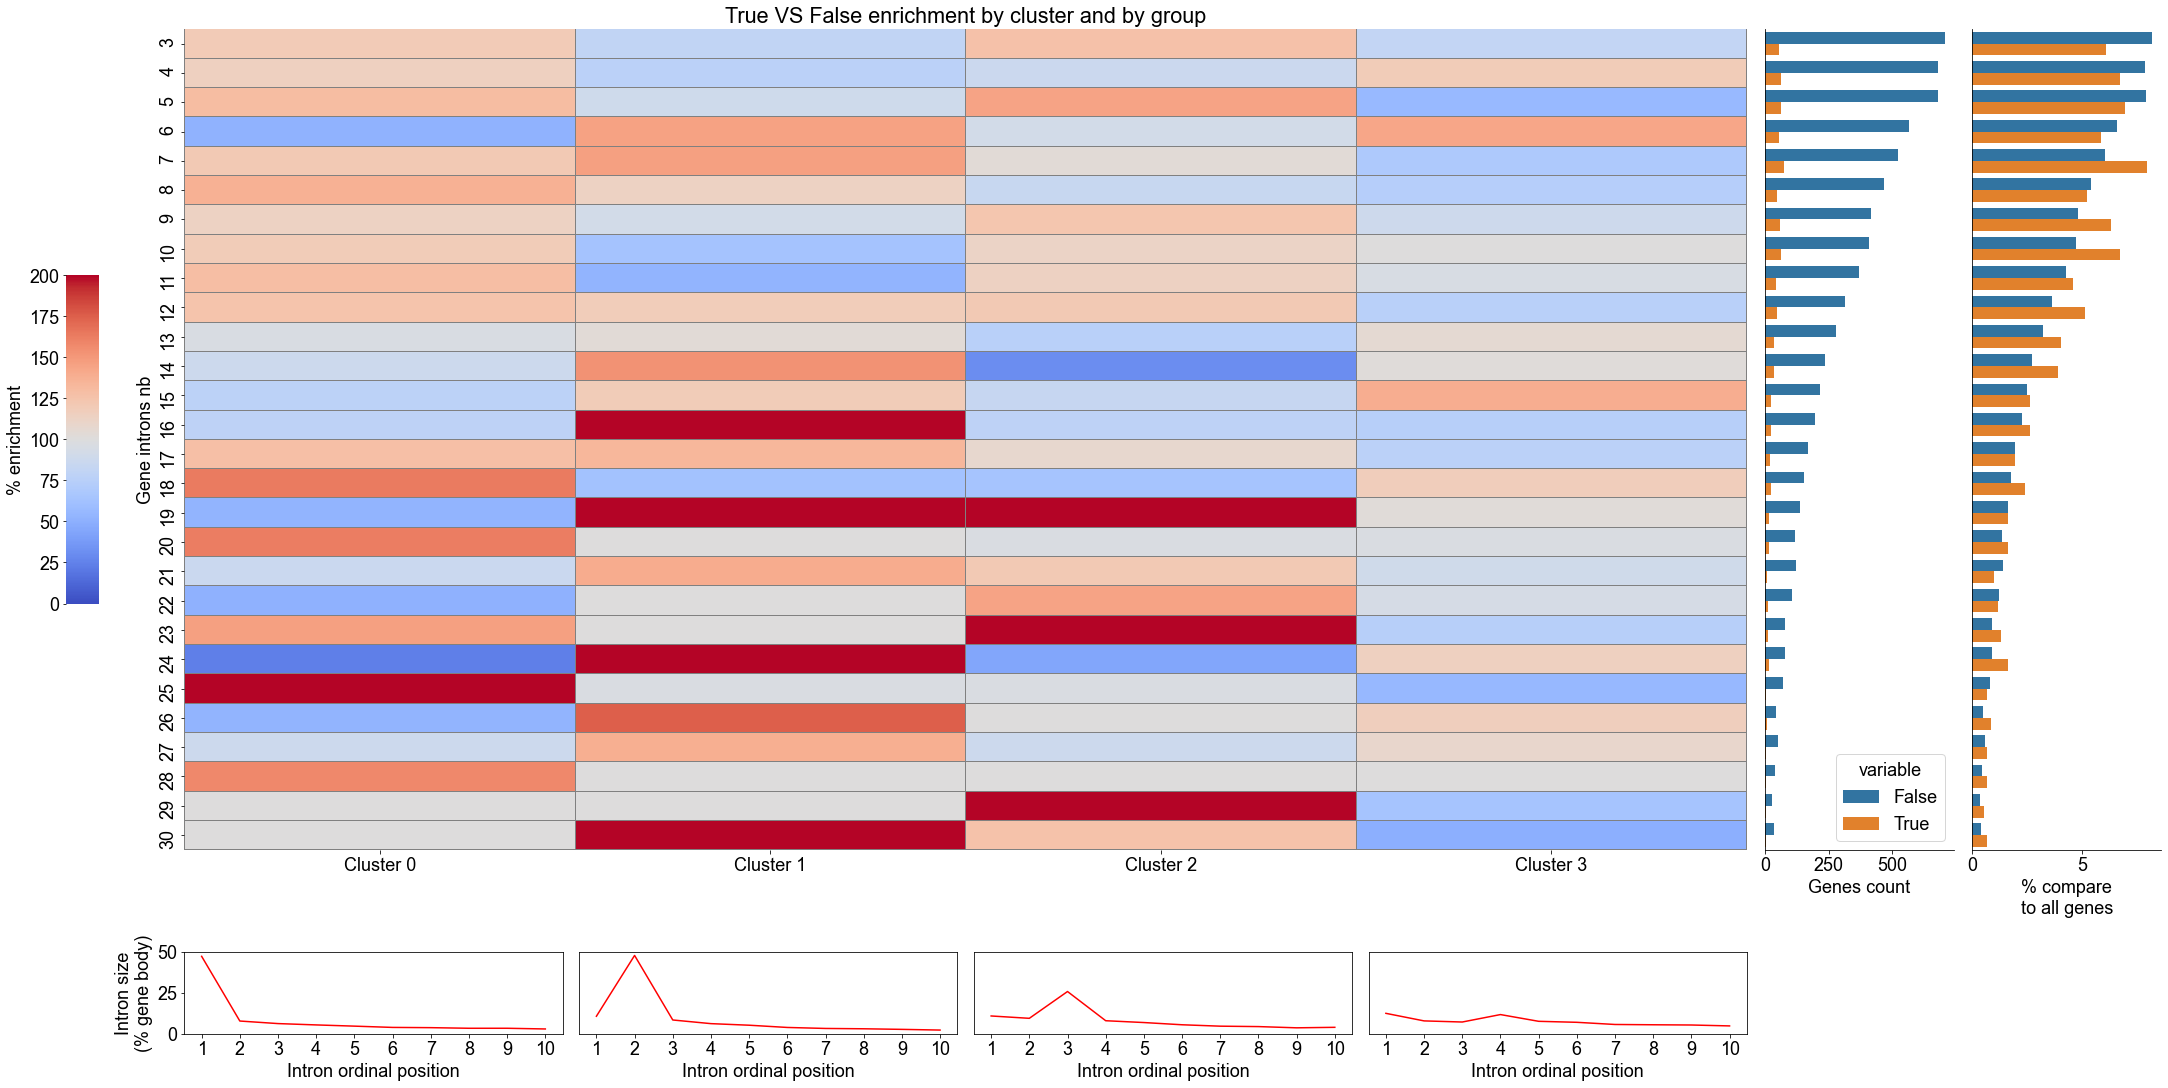

In [145]:
# Mass centers
l = list()
for i, e in enumerate(l_clusters_df):
    tmp_df_to_add = pd.DataFrame.from_records(e)
    tmp_df_to_add['Introns_nb'] = 3 + i
    l.append(tmp_df_to_add)
concat = pd.concat(l)
concat = concat[['Introns_nb'] + list(range(0,30))]
concat.index.names = ["Cluster"]
concat.index = [e for e in list(concat.index)]


# Index order
def return_index(r):
    r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
    return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
index_df = index_df - 1
# index_df.columns = [int(e) +1 for e in index_df.columns]


plt.rcParams.update({'font.size' : 18})

fig3 = plt.figure(constrained_layout=True, figsize=(30,15))
gs = fig3.add_gridspec(nrows=2, ncols=6, width_ratios = [2,2,2,2,1,1], height_ratios = [10,1])
ax_heatmap = fig3.add_subplot(gs[0, : -2])
ax_barplot1 = fig3.add_subplot(gs[0, -2])
ax_barplot2 = fig3.add_subplot(gs[0, -1])

ax_cluster1 = fig3.add_subplot(gs[1, 0])
ax_cluster2 = fig3.add_subplot(gs[1, 1])
ax_cluster3 = fig3.add_subplot(gs[1, 2])
ax_cluster4 = fig3.add_subplot(gs[1, 3])



fold_df = pd.concat([e.Fold.drop('Sum').sort_index() for e in l_fold_df], axis=1).T.reset_index(drop=True).reset_index().rename({'index' : 'Introns_nb'}, axis=1).fillna(1)
fold_df['Introns_nb'] = fold_df['Introns_nb'] + 3
fold_df = fold_df.set_index('Introns_nb')

data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
data = data * 100
# data.to_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment.xlsx')




sns.heatmap(data=data, center=100, vmin=0, vmax=200, cmap='coolwarm', linecolor='grey', lw=0.01, ax=ax_heatmap, cbar_kws={"shrink": .4, "use_gridspec" : False, "location" : "left", 'label' : '% enrichment'})
ax_heatmap.set_xticklabels(['Cluster {}'.format(i) for i in range(0,4)])
ax_heatmap.set_ylabel('Gene introns nb')
ax_heatmap.set_title('{} VS {} enrichment by cluster and by group'.format('True', 'False'))



concat_gb = pd.concat(l_fold_df).reset_index()
concat_gb['Introns_nb'] = [sub_e for e in list(range(3,31)) for sub_e in 5*[e]]
concat_gb_raw = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False_raw', 'True_raw'])
concat_gb_raw['variable'] = concat_gb_raw['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
concat_gb_raw['Introns_nb'] = concat_gb_raw['Introns_nb'].astype(str)

concat_gb_ratio = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False', 'True'])
concat_gb_ratio['variable'] = concat_gb_ratio['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
concat_gb_ratio['Introns_nb'] = concat_gb_ratio['Introns_nb'].astype(str)

data_test = pd.DataFrame([{'Siso' : i, 'Miso': j, "x" : x} for x, i, j in zip(range(3,31), range(10,1000,10), range(20,2000,20))]).melt(id_vars='x', value_vars=['Siso', 'Miso'])
data_test['x'] = data_test['x'].astype(str)

sns.barplot(data=concat_gb_raw, y='Introns_nb', x='value', hue='variable', ax=ax_barplot1)
ax_barplot1.set_yticklabels([])
ax_barplot1.set_ylabel('')
ax_barplot1.set_xlabel('Genes count')
ax_barplot1.yaxis.set_ticks_position('none') 
ax_barplot1.spines['right'].set_linewidth(0)
ax_barplot1.spines['top'].set_linewidth(0)



sns.barplot(data=concat_gb_ratio, y='Introns_nb', x='value', hue='variable', ax=ax_barplot2)
ax_barplot2.set_yticklabels([])
ax_barplot2.set_ylabel('')
ax_barplot2.set_xlabel('% compare\nto all genes')
ax_barplot2.yaxis.set_ticks_position('none') 
ax_barplot2.spines['right'].set_linewidth(0)
ax_barplot2.spines['top'].set_linewidth(0)
ax_barplot2.legend().remove()





map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']

fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
fillna = fillna.rename({'index' : 'cluster'}, axis=1)

fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
fillna['cluster_new'] = fillna['id'].map(map_d)
data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
data_profiles = 100 * data_profiles


ax_cluster1.plot(list(range(1,11)), data_profiles.loc[0].values, color='red')
ax_cluster1.set_xlabel('Intron ordinal position')
ax_cluster1.set_xticks([i for i in range(1,11)])
ax_cluster1.set_ylim(0,50)
ax_cluster1.set_ylabel('Intron size\n(% gene body)')
# ax.yaxis.get_minor_ticks()
# ax_cluster1.set_xticklabels([str(i) for i in range(1,11)])

ax_cluster2.plot(list(range(1,11)), data_profiles.loc[1].values, color='red')
ax_cluster2.set_xlabel('Intron ordinal position')
ax_cluster2.set_xticks([i for i in range(1,11)])
ax_cluster2.set_yticks([])

ax_cluster3.plot(list(range(1,11)), data_profiles.loc[2].values, color='red')
ax_cluster3.set_xlabel('Intron ordinal position')
ax_cluster3.set_xticks([i for i in range(1,11)])
ax_cluster3.set_ylim(0,50)
ax_cluster3.set_yticks([])

ax_cluster4.plot(list(range(1,11)), data_profiles.loc[3].values, color='red')
ax_cluster4.set_xlabel('Intron ordinal position')
ax_cluster4.set_xticks([i for i in range(1,11)])
ax_cluster4.set_ylim(0,50)
ax_cluster4.set_yticks([])



In [456]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

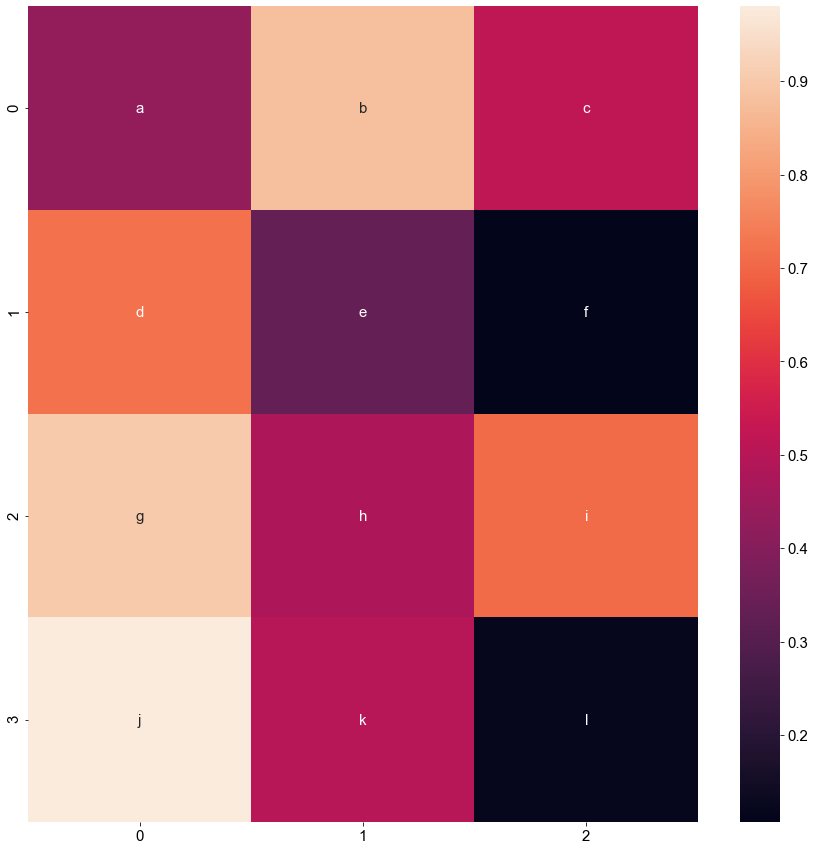

In [463]:
plt.figure(figsize=(15,15))
results = np.random.rand(4, 3)
strings = np.asarray([
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i'],
    ['j', 'k', 'l']
]
)


sns.heatmap(results, annot=strings, fmt="",)


In [81]:
index_df

level_1     0  1  2  3
Introns_nb            
3           0  1  2  3
4           3  2  1  0
5           1  0  3  2
6           1  0  3  2
7           2  0  1  3
8           2  1  3  0
9           1  0  2  3
10          0  1  3  2
11          2  3  0  1
12          1  0  2  3
13          1  0  2  3
14          1  0  0  2
15          1  0  2  3
16          0  3  2  1
17          3  0  2  1
18          3  0  1  2
19          1  3  2  0
20          2  0  3  1
21          2  3  0  1
22          3  0  0  1
23          1  2  3  0
24          0  3  1  2
25          0  2  2  1
26          1  3  2  0
27          0  2  1  3
28          0  1  0  2
29          1  2  0  3
30          1  2  3  0

# Concat mass centers of clusters

In [86]:
l = list()
for i, e in enumerate(l_clusters_df):
    tmp_df_to_add = pd.DataFrame.from_records(e)
    tmp_df_to_add['Introns_nb'] = 3 + i
    l.append(tmp_df_to_add)
concat = pd.concat(l)
concat = concat[['Introns_nb'] + list(range(0,27))]
concat.index.names = ["Cluster"]
concat.index = [e for e in list(concat.index)]
concat
# 

Introns_nb     0     1     2     3     4     5     6     7     8  ...  \
0            3  0.49  0.23  0.28   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1            3  0.19  0.62  0.20   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2            3  0.79  0.10  0.10   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3            3  0.18  0.17  0.66   NaN   NaN   NaN   NaN   NaN   NaN  ...   
0            4  0.64  0.14  0.12  0.11   NaN   NaN   NaN   NaN   NaN  ...   
..         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
3           26  0.08  0.06  0.38  0.04  0.04  0.04  0.01  0.03  0.02  ...   
0           27  0.04  0.04  0.05  0.05  0.03  0.04  0.04  0.05  0.05  ...   
1           27  0.44  0.07  0.05  0.03  0.02  0.04  0.01  0.01  0.02  ...   
2           27  0.06  0.31  0.04  0.04  0.06  0.06  0.02  0.03  0.01  ...   
3           27  0.23  0.05  0.04  0.05  0.03  0.03  0.04  0.03  0.04  ...   

      17    18    19    20    21    22    23    24    25    26  
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
3   0.01  0.01  0.01  0.01  0.02  0.01  0.01  0.01  0.02   NaN  
0   0.03  0.03  0.03  0.02  0.03  0.03  0.03  0.04  0.04  0.04  
1   0.01  0.02  0.02  0.02  0.01  0.02  0.01  0.01  0.01  0.02  
2   0.03  0.02  0.01  0.02  0.01  0.02  0.01  0.02  0.01  0.02  
3   0.02  0.03  0.02  0.03  0.02  0.03  0.03  0.02  0.02  0.02  

[100 rows x 28 columns]

## Convert cluster identifier to real one
0 : Bigger first intron

1 : Bigger second intron 
...

In [87]:
def return_index(r):
    r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
    return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
index_df = index_df - 1
# index_df.columns = [int(e) +1 for e in index_df.columns]
index_df

level_1     0  1  2  3
Introns_nb            
3           2  1  3  0
4           0  2  3  1
5           1  3  0  2
6           2  3  1  0
7           2  3  0  1
8           2  0  3  1
9           0  2  1  3
10          1  0  3  2
11          3  1  0  2
12          0  3  2  1
13          1  2  0  3
14          1  2  3  0
15          2  1  0  3
16          1  0  3  2
17          0  1  2  3
18          2  1  3  0
19          1  3  3  0
20          0  1  3  2
21          2  3  0  1
22          1  2  0  3
23          3  1  2  0
24          2  0  3  1
25          3  2  2  0
26          2  0  3  1
27          1  2  0  3

In [76]:

map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']

fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
fillna = fillna.rename({'index' : 'cluster'}, axis=1)
fillna

# fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
# fillna['cluster_new'] = fillna['id'].map(map_d)
# data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
# data_profiles = 100 * data_profiles


cluster  Introns_nb     0     1     2     3     4     5     6     7  \
0          0           3  0.49  0.23  0.28  0.06  0.05  0.05  0.04  0.04   
1          1           3  0.19  0.62  0.20  0.06  0.05  0.05  0.04  0.04   
2          2           3  0.79  0.10  0.10  0.06  0.05  0.05  0.04  0.04   
3          3           3  0.18  0.17  0.66  0.06  0.05  0.05  0.04  0.04   
4          0           4  0.20  0.16  0.14  0.51  0.05  0.05  0.04  0.04   
..       ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   
107        3          29  0.14  0.32  0.06  0.07  0.04  0.03  0.02  0.03   
108        0          30  0.06  0.35  0.07  0.05  0.04  0.00  0.02  0.03   
109        1          30  0.06  0.05  0.05  0.04  0.05  0.03  0.03  0.02   
110        2          30  0.36  0.05  0.03  0.03  0.03  0.02  0.02  0.03   
111        3          30  0.11  0.08  0.22  0.07  0.05  0.06  0.03  0.02   

        8     9  
0    0.04  0.03  
1    0.04  0.03  
2    0.04  0.03  
3    0.04  0.03  
4    0.04  0.03  
..    ...   ...  
107  0.01  0.03  
108  0.02  0.01  
109  0.04  0.03  
110  0.02  0.03  
111  0.03  0.02  

[112 rows x 12 columns]

[]

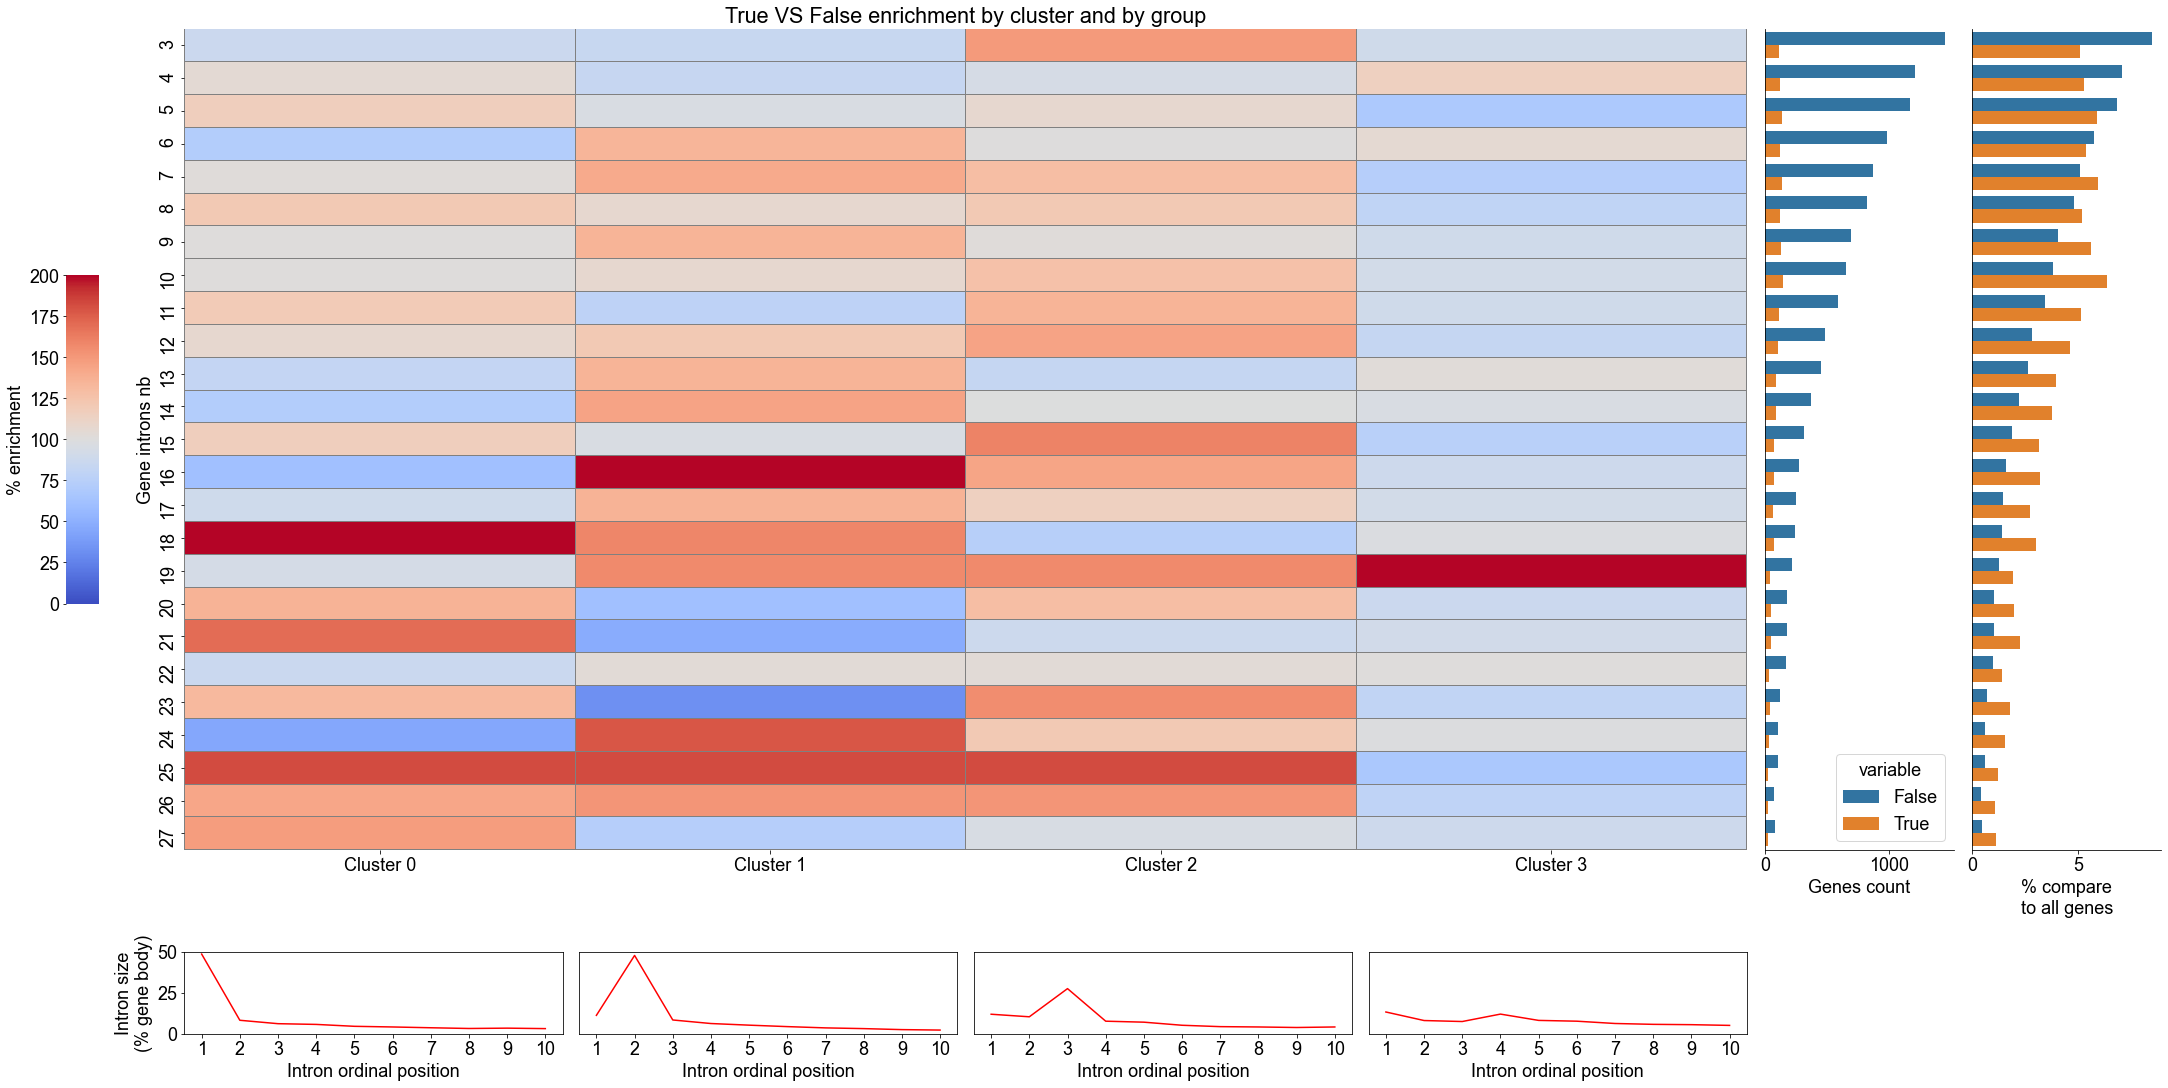

In [96]:
# Mass centers
l = list()
for i, e in enumerate(l_clusters_df):
    tmp_df_to_add = pd.DataFrame.from_records(e)
    tmp_df_to_add['Introns_nb'] = 3 + i
    l.append(tmp_df_to_add)
concat = pd.concat(l)
concat = concat[['Introns_nb'] + list(range(0,27))]
concat.index.names = ["Cluster"]
concat.index = [e for e in list(concat.index)]


# Index order
def return_index(r):
    r = r.drop(['Introns_nb'], axis=1).dropna(axis=1)
    return r.apply(lambda r: [i+1 for i,e in enumerate(r) if e == max(r)][0])

index_df = concat.groupby('Introns_nb').apply(return_index).reset_index().pivot(index='Introns_nb', columns='level_1', values=0)[[0,1,2]].astype(int)
index_df[3] = index_df.apply(lambda r: [i for i in range(1,5) if i not in r.values.tolist()][0], axis=1)
index_df = index_df - 1
# index_df.columns = [int(e) +1 for e in index_df.columns]


plt.rcParams.update({'font.size' : 18})

fig3 = plt.figure(constrained_layout=True, figsize=(30,15))
gs = fig3.add_gridspec(nrows=2, ncols=6, width_ratios = [2,2,2,2,1,1], height_ratios = [10,1])
ax_heatmap = fig3.add_subplot(gs[0, : -2])
ax_barplot1 = fig3.add_subplot(gs[0, -2])
ax_barplot2 = fig3.add_subplot(gs[0, -1])

ax_cluster1 = fig3.add_subplot(gs[1, 0])
ax_cluster2 = fig3.add_subplot(gs[1, 1])
ax_cluster3 = fig3.add_subplot(gs[1, 2])
ax_cluster4 = fig3.add_subplot(gs[1, 3])



fold_df = pd.concat([e.Fold.drop('Sum').sort_index() for e in l_fold_df], axis=1).T.reset_index(drop=True).reset_index().rename({'index' : 'Introns_nb'}, axis=1).dropna()
fold_df['Introns_nb'] = fold_df['Introns_nb'] + 3
fold_df = fold_df.set_index('Introns_nb')

data = pd.concat([fold_df, index_df.apply(list, axis=1).rename('Order')], axis=1)
data = pd.DataFrame(data.apply(lambda r: pd.Series([r[i] for i in r['Order'] if i < 4]), axis=1))
data = data * 100
# data.to_excel('/gstock/EXOTIC/data/CLUSTERING/fold_enrichment.xlsx')




sns.heatmap(data=data, center=100, vmin=0, vmax=200, cmap='coolwarm', linecolor='grey', lw=0.01, ax=ax_heatmap, cbar_kws={"shrink": .4, "use_gridspec" : False, "location" : "left", 'label' : '% enrichment'})
ax_heatmap.set_xticklabels(['Cluster {}'.format(i) for i in range(0,4)])
ax_heatmap.set_ylabel('Gene introns nb')
ax_heatmap.set_title('{} VS {} enrichment by cluster and by group'.format('True', 'False'))



concat_gb = pd.concat(l_fold_df).reset_index()
concat_gb['Introns_nb'] = [sub_e for e in list(range(3,28)) for sub_e in 5*[e]]
concat_gb_raw = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False_raw', 'True_raw'])
concat_gb_raw['variable'] = concat_gb_raw['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
concat_gb_raw['Introns_nb'] = concat_gb_raw['Introns_nb'].astype(str)

concat_gb_ratio = concat_gb.loc[concat_gb['cluster'] == 'Sum'].melt(id_vars='Introns_nb', value_vars=['False', 'True'])
concat_gb_ratio['variable'] = concat_gb_ratio['variable'].replace({'False_raw' : 'False', 'True_raw' : 'True'})
concat_gb_ratio['Introns_nb'] = concat_gb_ratio['Introns_nb'].astype(str)

data_test = pd.DataFrame([{'Siso' : i, 'Miso': j, "x" : x} for x, i, j in zip(range(3,31), range(10,1000,10), range(20,2000,20))]).melt(id_vars='x', value_vars=['Siso', 'Miso'])
data_test['x'] = data_test['x'].astype(str)

sns.barplot(data=concat_gb_raw, y='Introns_nb', x='value', hue='variable', ax=ax_barplot1)
ax_barplot1.set_yticklabels([])
ax_barplot1.set_ylabel('')
ax_barplot1.set_xlabel('Genes count')
ax_barplot1.yaxis.set_ticks_position('none') 
ax_barplot1.spines['right'].set_linewidth(0)
ax_barplot1.spines['top'].set_linewidth(0)



sns.barplot(data=concat_gb_ratio, y='Introns_nb', x='value', hue='variable', ax=ax_barplot2)
ax_barplot2.set_yticklabels([])
ax_barplot2.set_ylabel('')
ax_barplot2.set_xlabel('% compare\nto all genes')
ax_barplot2.yaxis.set_ticks_position('none') 
ax_barplot2.spines['right'].set_linewidth(0)
ax_barplot2.spines['top'].set_linewidth(0)
ax_barplot2.legend().remove()





map_df_new_clusters = index_df.reset_index().melt(id_vars=['Introns_nb'], value_vars=list(range(0,4))).rename({'level_1' : 'cluster_new', 'value' : 'cluster'}, axis=1).sort_values(by=['Introns_nb', 'cluster'])
map_df_new_clusters['id'] = map_df_new_clusters['Introns_nb'].astype(str) + '-' + map_df_new_clusters['cluster'].astype(str)
map_d = map_df_new_clusters[['id', 'cluster_new']].set_index('id').to_dict()['cluster_new']

fillna = concat.fillna(concat.median())[['Introns_nb'] + list(range(0,10))].reset_index()
fillna = fillna.rename({'index' : 'cluster'}, axis=1)

fillna['id'] = fillna['Introns_nb'].astype(str) + '-' + fillna['cluster'].astype(str)
fillna['cluster_new'] = fillna['id'].map(map_d)
data_profiles = fillna.groupby('cluster_new').mean().drop(['cluster', 'Introns_nb'], axis=1)
data_profiles = 100 * data_profiles


ax_cluster1.plot(list(range(1,11)), data_profiles.loc[0].values, color='red')
ax_cluster1.set_xlabel('Intron ordinal position')
ax_cluster1.set_xticks([i for i in range(1,11)])
ax_cluster1.set_ylim(0,50)
ax_cluster1.set_ylabel('Intron size\n(% gene body)')
# ax.yaxis.get_minor_ticks()
# ax_cluster1.set_xticklabels([str(i) for i in range(1,11)])

ax_cluster2.plot(list(range(1,11)), data_profiles.loc[1].values, color='red')
ax_cluster2.set_xlabel('Intron ordinal position')
ax_cluster2.set_xticks([i for i in range(1,11)])
ax_cluster2.set_yticks([])

ax_cluster3.plot(list(range(1,11)), data_profiles.loc[2].values, color='red')
ax_cluster3.set_xlabel('Intron ordinal position')
ax_cluster3.set_xticks([i for i in range(1,11)])
ax_cluster3.set_ylim(0,50)
ax_cluster3.set_yticks([])

ax_cluster4.plot(list(range(1,11)), data_profiles.loc[3].values, color='red')
ax_cluster4.set_xlabel('Intron ordinal position')
ax_cluster4.set_xticks([i for i in range(1,11)])
ax_cluster4.set_ylim(0,50)
ax_cluster4.set_yticks([])



In [469]:
data = pd.read_excel('/gstock/EXOTIC/data/CLUSTERING/data_profiles_equal.xlsx')
data['cluster_new'] = data['cluster_new'] + 1 
data

Condition  Introns_nb  cluster_new  variable  value
0         Miso           3            3         1   18.0
1         Miso           3            1         1   79.0
2         Miso           3            2         1   19.0
3         Miso           3            4         1   49.0
4         Miso           4            4         1   20.0
...        ...         ...          ...       ...    ...
1115      Miso          29            1        10    1.0
1116      Miso          30            1        10    3.0
1117      Miso          30            3        10    2.0
1118      Miso          30            4        10    3.0
1119      Miso          30            2        10    1.0

[1120 rows x 5 columns]

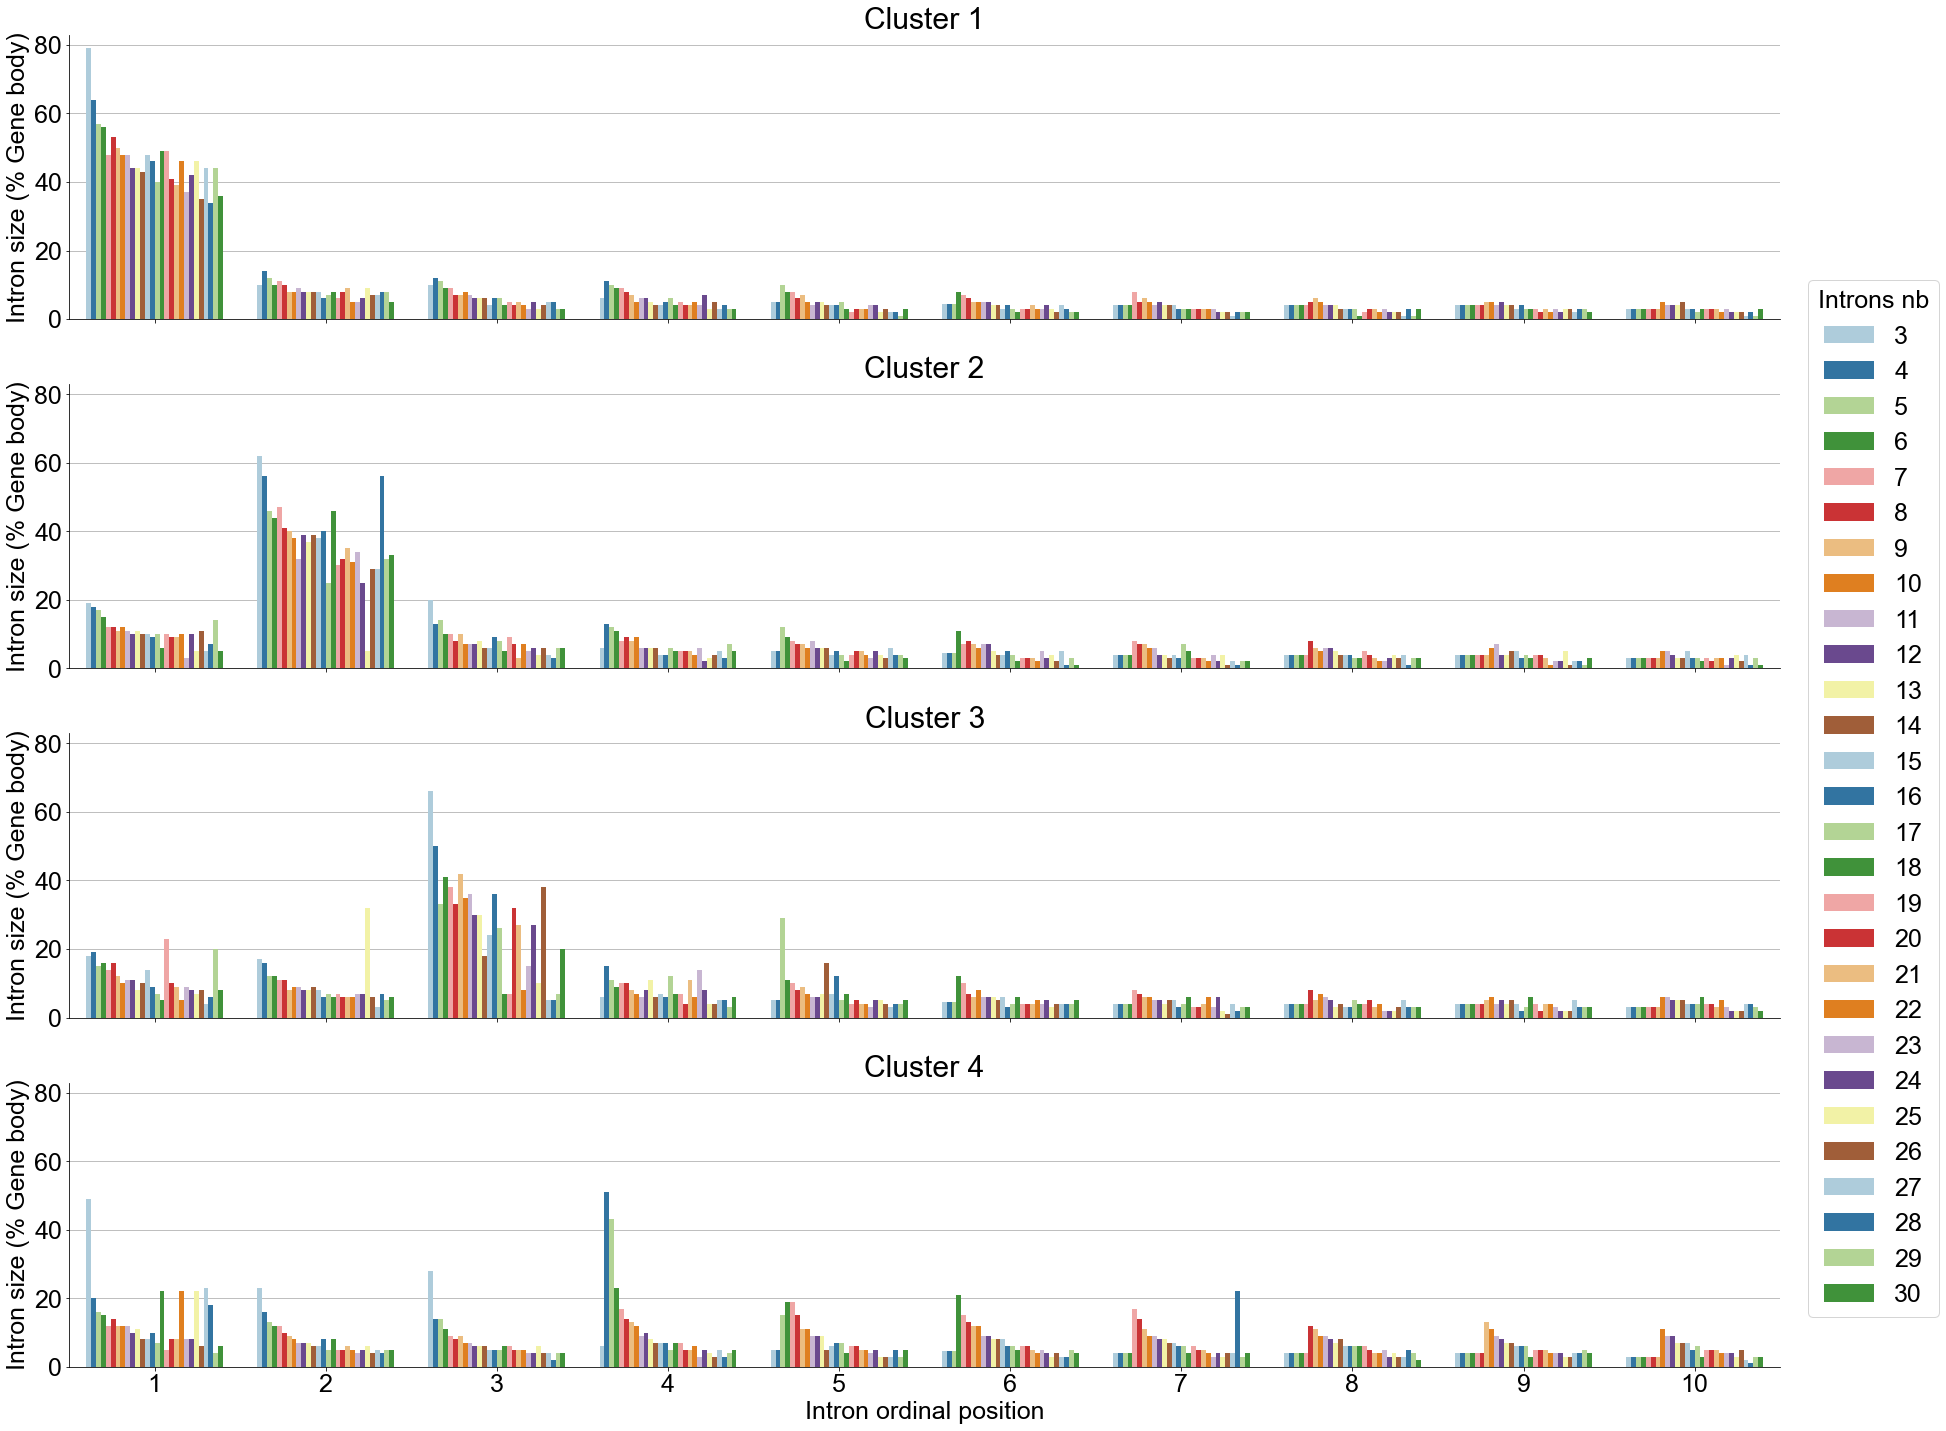

In [472]:
# data_lite = data.loc[data['Introns_nb']]
plt.rcParams.update({'font.size' : 25})
g = sns.FacetGrid(data.loc[data['Introns_nb'] < 40], row="cluster_new", height=5, aspect=5)
g.map_dataframe(sns.barplot, x='variable', y='value', hue='Introns_nb', palette='Paired')
plt.legend(loc='center right', bbox_to_anchor=(1.1,2), title='Introns nb')
for j, ax in enumerate(g.axes.ravel()):
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    ax.set_title('Cluster {}'.format(str(j+1)))
    ax.set_ylabel('Intron size (% Gene body)')
    if j == data.cluster_new.nunique() - 1:
        ax.set_xlabel('Intron ordinal position')        
# plt.savefig('/gstock/EXOTIC/data/CLUSTERING/intron_size_according_introns_nb.pngx', dpi=300)
# g.map_dataframe(sns.catplot, x='Introns_nb', y='value')
# g = sns.FacetGrid()
# sns.boxplot(data=data, x='variable', y='value', )

In [473]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [508]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

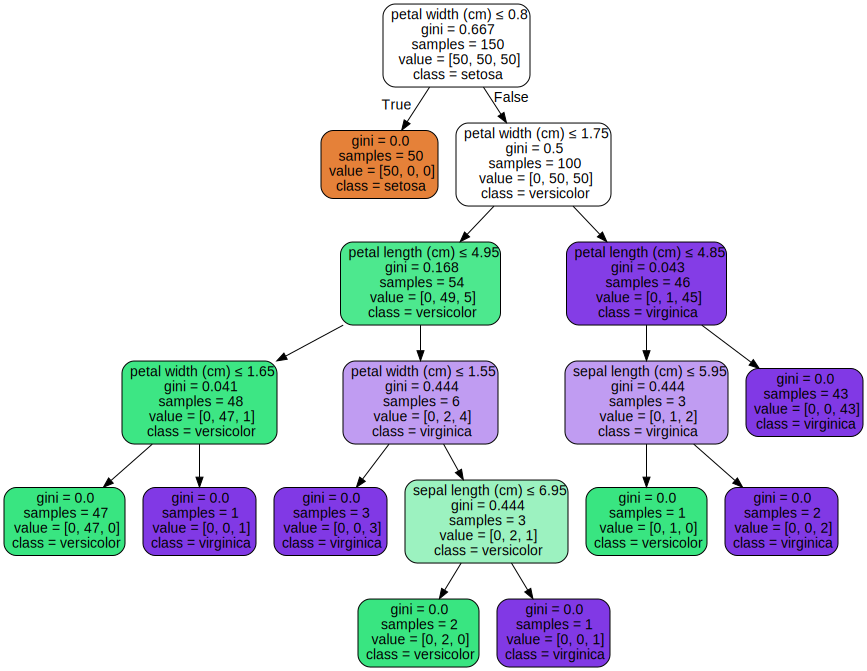

In [478]:
# f, ax = plt.subplots(figsize=(15,15))
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [694]:
df_raw = pd.read_parquet("/gstock/EXOTIC/data/GENOMICS/RefSeq_exons_simple.parquet")
df_raw["Introns_lengths"] = df_raw["Introns_ranges"].apply(
    lambda r: [
        int(e.split("-")[1]) - int(e.split("-")[0])
        for e in r
        if int(e.split("-")[1]) - int(e.split("-")[0]) > 0 and int(e.split("-")[1]) - int(e.split("-")[0]) < 2e6
    ]
)
df_raw["Introns_nb"] = df_raw["Introns_lengths"].str.len()
df_raw["Introns_lengths_ratio"] = df_raw["Introns_lengths"].apply(
            lambda r: pd.Series(pd.Series(r) / pd.Series(r).sum()).round(2).values.tolist()
        )
df_raw

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


Gene  mRNA_nb_total  Strand   Miso  \
0         A1BG              1       0  False   
1         A1CF              8       0   True   
2          A2M              4       0   True   
3        A2ML1              2       1   True   
4      A3GALT2              1       0  False   
...        ...            ...     ...    ...   
19301   ZYG11A              2       1   True   
19302   ZYG11B              1       1  False   
19303      ZYX              3       1   True   
19304    ZZEF1              1       0  False   
19305     ZZZ3              2       0   True   

                                                                                              Exons_ranges  \
0      [58864770-58864803, 58864658-58864693, 58864294-58864563, 58863649-58863921, 58862757-58863053, ...   
1      [52619602-52619700, 52610425-52610547, 52603748-52603882, 52601622-52601752, 52595834-52596072, ...   
2      [9268360-9268445, 9265956-9266139, 9264973-9265132, 9264755-9264807, 9262910-9262930, 9262463-92...   
3      [8975248-8975309, 8975778-8975961, 8976316-8976478, 8982323-8982375, 8987258-8987278, 8988103-89...   
4          [33786677-33786699, 33778408-33778491, 33778102-33778191, 33777653-33777790, 33772367-33773054]   
...                                                                                                    ...   
19301  [53308556-53308645, 53320137-53320302, 53322670-53323421, 53326403-53326543, 53329653-53329829, ...   
19302  [53192326-53192355, 53222130-53222295, 53236692-53237446, 53245525-53245665, 53250549-53250725, ...   
19303  [143078665-143078872, 143079341-143079540, 143079686-143079778, 143079894-143080415, 143085312-1...   
19304  [4045836-4046189, 4027201-4027345, 4020266-4020460, 4017593-4017764, 4015903-4016102, 4012947-40...   
19305  [78105134-78105156, 78097535-78099039, 78050202-78050340, 78047664-78047811, 78047461-78047576, ...   

                                                                                            Introns_ranges  \
0      [58864694-58864769, 58864564-58864657, 58863922-58864293, 58863054-58863648, 58862018-58862756, ...   
1      [52610548-52619601, 52603883-52610424, 52601753-52603747, 52596073-52601621, 52588056-52595833, ...   
2      [9266140-9268359, 9265133-9265955, 9264808-9264972, 9262931-9264754, 9262632-9262909, 9262002-92...   
3      [8975310-8975777, 8975962-8976315, 8976479-8982322, 8982376-8987257, 8987279-8988102, 8988263-89...   
4                             [33778492-33786676, 33778192-33778407, 33777791-33778101, 33773055-33777652]   
...                                                                                                    ...   
19301  [53308646-53320136, 53320303-53322669, 53323422-53326402, 53326544-53329652, 53329830-53332174, ...   
19302  [53192356-53222129, 53222296-53236691, 53237447-53245524, 53245666-53250548, 53250726-53255674, ...   
19303  [143078873-143079340, 143079541-143079685, 143079779-143079893, 143080416-143085311, 143085433-1...   
19304  [4027346-4045835, 4020461-4027200, 4017765-4020265, 4016103-4017592, 4013158-4015902, 4009104-40...   
19305  [78099040-78105133, 78050341-78097534, 78047812-78050201, 78047577-78047663, 78046755-78047460, ...   

       CDS_count  \
0              8   
1             12   
2             36   
3             36   
4              5   
...          ...   
19301         14   
19302         14   
19303          9   
19304         55   
19305         12   

                                                                                           Introns_lengths  \
0                                                                       [75, 93, 371, 594, 738, 2728, 322]   
1                                        [9053, 6541, 1994, 5548, 7777, 7480, 4271, 1942, 2679, 996, 3012]   
2      [2219, 822, 164, 1823, 277, 460, 1675, 917, 144, 1834, 2563, 238, 1619, 623, 2905, 453, 1392, 20...   
3      [467, 353, 5843, 4881, 823, 587, 1099, 768, 661, 2145, 1596, 1809, 266, 573, 1325, 1020, 753, 39...   


In [546]:
df_clustering = pd.read_excel("/gstock/EXOTIC/data/CLUSTERING/data_genes_clusetring_{}.xlsx".format('equal'))
df_clustering

Unnamed: 0  Introns_nb   Miso  cluster_new     Gene
0               5           3  False            0    ABHD8
1               6           3  False            0    ACBD7
2              16           3  False            0   ALKAL1
3              18           3  False            0   ALKBH7
4              21           3  False            0     ALX4
...           ...         ...    ...          ...      ...
14239          64          30   True            3     TPP2
14240          65          30   True            3  TSPOAP1
14241          67          30   True            3    USP40
14242          70          30   True            3    WDR17
14243          73          30   True            3   YEATS2

[14244 rows x 5 columns]

In [696]:
k_raw = 16
k = 5
# df_raw_10 = df_raw.loc[df_raw['Introns_nb'] == k_raw]
df_raw_10 = df_raw
df_raw_10_tree_data = pd.concat([df_raw_10[['Introns_nb', 'Gene', 'Miso']].reset_index(drop=True), 100 * pd.DataFrame.from_records(df_raw_10['Introns_lengths_ratio'].values)], axis=1)

# df_raw_10_tree_data = pd.concat([df_raw[['Introns_nb', 'Gene', 'Miso']].reset_index(drop=True), 100 * pd.DataFrame.from_records(df_raw['Introns_lengths_ratio'].values)], axis=1)
df_raw_10_tree_data = pd.merge(df_clustering[['Gene','cluster_new']], df_raw_10_tree_data, on='Gene')
# df_raw_10_tree_data = df_raw_10_tree_data.loc[df_raw_10_tree_data['cluster_new'] == 1]
df_raw_10_tree_data['Miso'] = df_raw_10_tree_data['Miso'].replace({True : 1, False : 0})
df_raw_10_tree_data = df_raw_10_tree_data[['Gene', 'cluster_new', 'Introns_nb', 'Miso'] + list(range(0,k))]
df_raw_10_tree_data = pd.concat([df_raw_10_tree_data[['Gene', 'cluster_new', 'Introns_nb', 'Miso']], df_raw_10_tree_data[list(range(0,k))].fillna(df_raw_10_tree_data[list(range(0,k))].median()).astype(int)], axis=1)
df_raw_10_tree_data = df_raw_10_tree_data.sort_values(by=['cluster_new']).groupby('cluster_new').apply(lambda r: r.sort_values(by=[r.cluster_new.unique()[0]] + [e for e in list(range(0,k)) if e != r.cluster_new.unique()[0]], ascending=False)).reset_index(drop=True)
df_raw_10_tree_data.to_excel('/gstock/EXOTIC/data/CLUSTERING/data_genes_clustering_processed_R.xlsx', index=False)
df_raw_10_tree_data

Gene  cluster_new  Introns_nb  Miso   0  1  2  3   4
0        DKK2            0           3     0  99  1  0  6   5
1        RYBP            0           3     0  99  0  1  6   5
2       VSTM5            0           3     0  99  0  0  6   5
3      S100A8            0           3     1  98  1  1  6   5
4      ZNF670            0           3     1  98  1  1  6   5
...       ...          ...         ...   ...  .. .. .. ..  ..
14239  ZNF185            3          23     1   0  1  4  0   1
14240  ACTR3C            3          11     1   0  1  1  0   9
14241   HDAC8            3          12     1   0  1  0  0  30
14242   NETO1            3          13     1   0  1  0  0   5
14243    PARN            3          23     1   0  1  0  0   5

[14244 rows x 9 columns]

In [572]:
scipy.stats.zscore([1,5,2])

array([-0.98058068,  1.37281295, -0.39223227])

In [644]:
import scipy
def zscore_fct(r):
    zscore_list = [round(e,2) for e in list(scipy.stats.zscore(r[list(range(0,k))].values.tolist()))]
    return pd.Series([round(max(zscore_list), 2), int(zscore_list.index(max(zscore_list))), zscore_list])
tqdm.pandas()
df_raw_10_tree_data[["Zscore_max", "Index_zscore_max", "Zscore_list"]] = df_raw_10_tree_data.progress_apply(zscore_fct, axis=1)
df_raw_10_tree_data

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 14244/14244 [00:09<00:00, 1507.66it/s]


Gene  cluster_new  Introns_nb  Miso   0  1  2  3   4  Zscore_max  \
0        DKK2            0           3     0  99  1  0  6   5        2.00   
1        RYBP            0           3     0  99  0  1  6   5        2.00   
2       VSTM5            0           3     0  99  0  0  6   5        2.00   
3      S100A8            0           3     1  98  1  1  6   5        2.00   
4      ZNF670            0           3     1  98  1  1  6   5        2.00   
...       ...          ...         ...   ...  .. .. .. ..  ..         ...   
14239  ZNF185            3          23     1   0  1  4  0   1        1.91   
14240  ACTR3C            3          11     1   0  1  1  0   9        1.98   
14241   HDAC8            3          12     1   0  1  0  0  30        2.00   
14242   NETO1            3          13     1   0  1  0  0   5        1.96   
14243    PARN            3          23     1   0  1  0  0   5        1.96   

       Index_zscore_max                         Zscore_list  
0                     0   [2.0, -0.55, -0.58, -0.42, -0.45]  
1                     0   [2.0, -0.58, -0.55, -0.42, -0.45]  
2                     0   [2.0, -0.57, -0.57, -0.41, -0.44]  
3                     0   [2.0, -0.56, -0.56, -0.43, -0.45]  
4                     0   [2.0, -0.56, -0.56, -0.43, -0.45]  
...                 ...                                 ...  
14239                 2  [-0.82, -0.14, 1.91, -0.82, -0.14]  
14240                 4  [-0.64, -0.35, -0.35, -0.64, 1.98]  
14241                 4   [-0.52, -0.44, -0.52, -0.52, 2.0]  
14242                 4   [-0.62, -0.1, -0.62, -0.62, 1.96]  
14243                 4   [-0.62, -0.1, -0.62, -0.62, 1.96]  

[14244 rows x 12 columns]

In [636]:
pd.options.display.max_colwidth = 100
df_raw_10_tree_data = df_raw_10_tree_data.sort_values(by=['cluster_new']).groupby('cluster_new').apply(lambda r: r.sort_values(by=[r.cluster_new.unique()[0]] + [e for e in list(range(0,k)) if e != r.cluster_new.unique()[0]], ascending=False)).reset_index(drop=True)

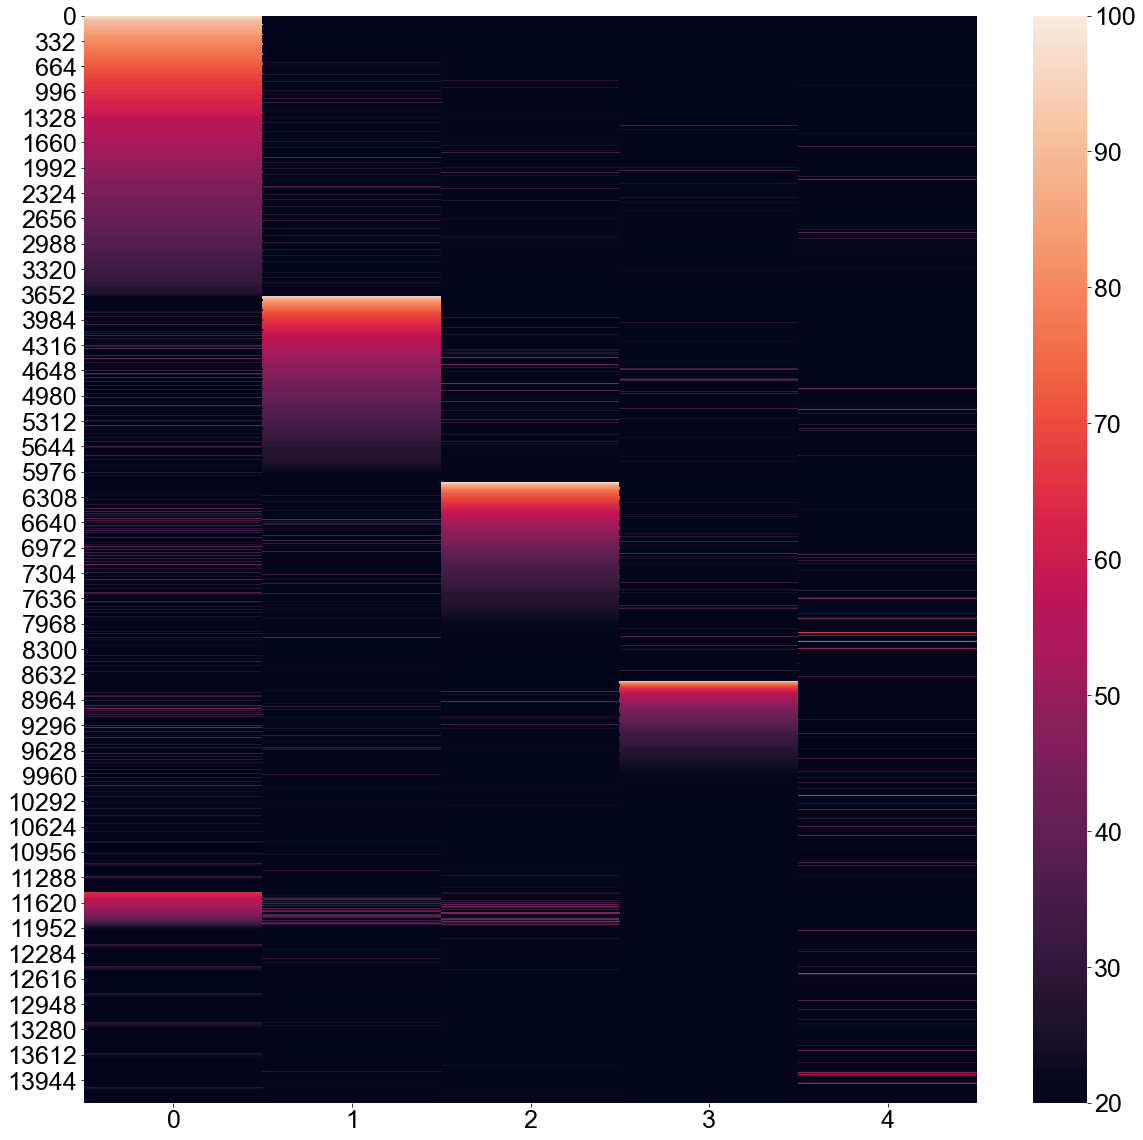

In [640]:
f = plt.figure(figsize=(20,20))
sns.heatmap(df_raw_10_tree_data[list(range(0,k))], vmin=20, vmax=100)

In [697]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
# X, y = df_raw_10_tree_data[list(range(0,k))], df_raw_10_tree_data.Miso
X, y = df_raw_10_tree_data[['Introns_nb'] + list(range(0,k))], df_raw_10_tree_data.Miso
# X, y = df_raw_10_tree_data[list(range(0,k))], df_raw_10_tree_data.Miso
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [493]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [520]:
clf.feature_importances_

array([0.42270301, 0.31999623, 0.25160879, 0.00122377, 0.00373808,
       0.        , 0.00073012, 0.        , 0.        , 0.        ])

['Inb', '1', '2', '3', '4', '5']


[Text(0, 0, 'Inb'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

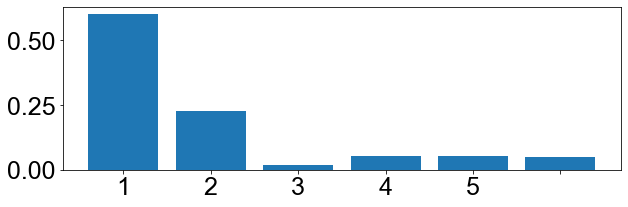

In [710]:
f, ax = plt.subplots(figsize=(10,3))
ax.bar(range(1, len(clf.feature_importances_) +1 ), clf.feature_importances_)
print(['Inb'] + [str(e) for e in range(1, len(clf.feature_importances_))])
ax.set_xticklabels(['Inb'] + [str(e) for e in range(1, len(clf.feature_importances_))])

5


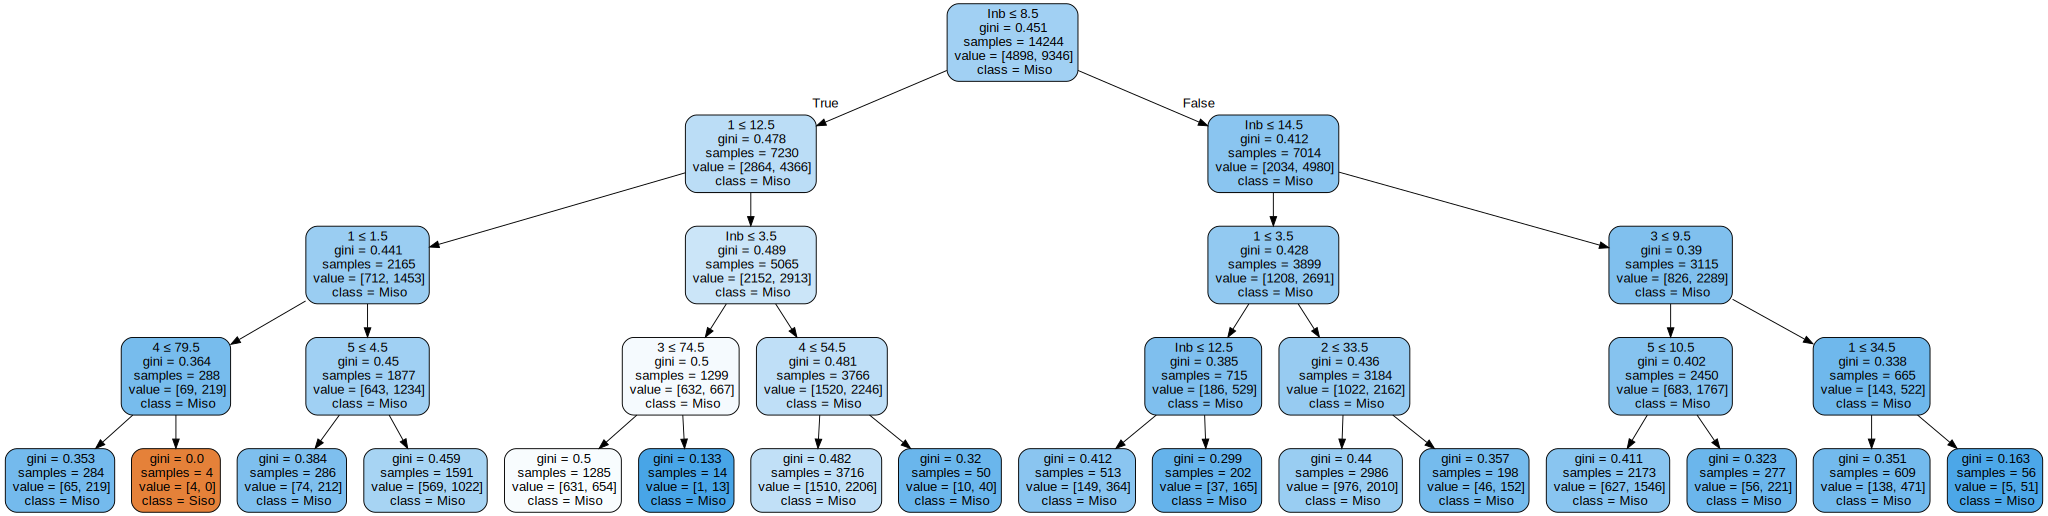

In [708]:
# f, ax = plt.subplots(figsize=(15,15))
print(k)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=['Inb'] +  list(range(1,k+1)),  
                     class_names=['Siso', 'Miso'],  
#                     class_names=['1','2','3','4'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

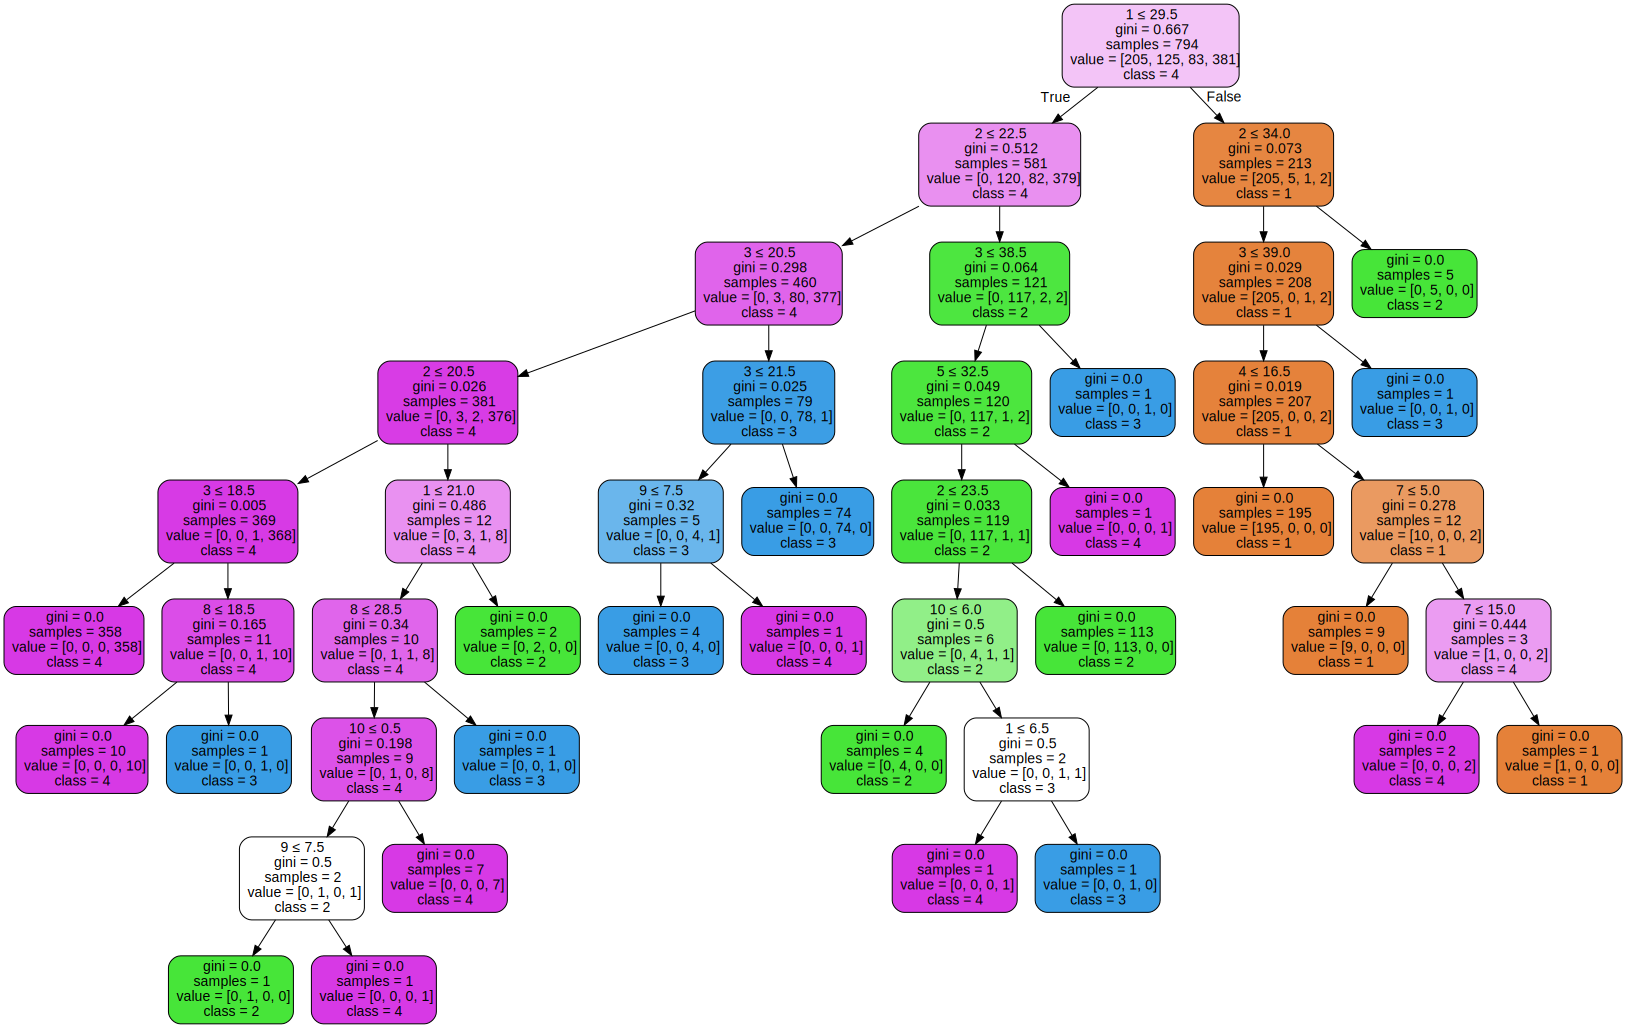

In [529]:
# f, ax = plt.subplots(figsize=(15,15))
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(range(1,11)),  
                     class_names=[str(e) for e in list(range(1,5))],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 